## Exploratory Data Analysis - Customer Loans in Finance

This notebook documents the process of performing Exploratory Data Analysis (EDA) on the customer loans dataset. The following tasks will be covered:

1. **Convert columns to the correct format**
2. **Create a class to get information from the DataFrame**
3. **Remove/impute missing values in the data**
4. **Perform transformation on skewed columns**
5. **Remove outliers from the data**
6. **Drop overly correlated columns**


### Task 1: Convert Columns to the Correct Format

We will start by converting columns to the correct format. This includes converting columns to numeric, datetime, or categorical types, and removing symbols.


In [1]:
# Convert Columns to the Correct Format

import pandas as pd
from data_transform import DataTransform

# Load the CSV file
original_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\loan_payments.csv'
df = pd.read_csv(original_csv_file_path)

# Initialize DataTransform with the DataFrame
transformer = DataTransform(df)

# Apply transformations
transformed_df = transformer.apply_transformations()

# Save the transformed DataFrame back to CSV
transformed_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\transformed_loan_payments.csv'
transformed_df.to_csv(transformed_csv_file_path, index=False)
print(f"Transformed data saved to {transformed_csv_file_path}")


Transformed data saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\transformed_loan_payments.csv


### Task 2: Create a Class to Get Information from the DataFrame

Next, we will create a `DataFrameInfo` class to extract useful information from the DataFrame.


In [2]:
# Create a Class to Get Information from the DataFrame

from dataframe_info import DataFrameInfo

# Creating an instance of DataFrameInfo with the transformed DataFrame
df_info = DataFrameInfo(transformed_df)

# Example 
print("Column Descriptions:\n", df_info.describe_columns())
print("\nStatistics:\n", df_info.extract_statistics())
print("\nDistinct Values Count in Categorical Columns:\n", df_info.count_distinct_values())
print("\nDataFrame Shape:\n", df_info.shape())
print("\nNULL Values Count:\n", df_info.null_values_count())
print("\nHead:\n", df_info.head())
print("\nTail:\n", df_info.tail())
print("\nUnique Values in 'loan_status':\n", df_info.unique_values('loan_status'))


Column Descriptions:
 id                                int64
member_id                         int64
loan_amount                       int64
funded_amount                   float64
funded_amount_inv               float64
term                            float64
int_rate                        float64
instalment                      float64
grade                          category
sub_grade                      category
employment_length              category
home_ownership                 category
annual_inc                      float64
verification_status            category
issue_date                       object
loan_status                    category
payment_plan                   category
purpose                        category
dti                             float64
delinq_2yrs                       int64
earliest_credit_line             object
inq_last_6mths                    int64
mths_since_last_delinq          float64
mths_since_last_record          float64
open_accounts     

### Task 3: Remove/Impute Missing Values in the Data

We will remove columns with a high percentage of missing values and impute the remaining missing values using the median or mean.


In [3]:
from dataframe_transform import DataFrameTransform

# Initialize DataFrameTransform with the transformed DataFrame
df_transform = DataFrameTransform(transformed_df)

# Get missing values summary and drop columns with more than 50% missing values
cleaned_df = df_transform.drop_missing_values(threshold=50)

# Impute missing values intelligently
imputed_df = df_transform.intelligent_impute_missing_values(skew_threshold=1)

# Check for remaining NULL values
final_missing_summary = df_transform.missing_values_summary()
print("\nFinal Missing Values Summary:\n", final_missing_summary)

# Save the cleaned DataFrame back to CSV
cleaned_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments.csv'
imputed_df.to_csv(cleaned_csv_file_path, index=False)
print(f"Cleaned data saved to {cleaned_csv_file_path}")



Final Missing Values Summary:
                             null_count  null_percentage
id                                   0             0.00
member_id                            0             0.00
loan_amount                          0             0.00
funded_amount                        0             0.00
funded_amount_inv                    0             0.00
term                                 0             0.00
int_rate                             0             0.00
instalment                           0             0.00
grade                                0             0.00
sub_grade                            0             0.00
employment_length                 2118             3.91
home_ownership                       0             0.00
annual_inc                           0             0.00
verification_status                  0             0.00
issue_date                           0             0.00
loan_status                          0             0.00
payment_plan    

### Task 4: Perform Transformation on Skewed Columns

We will identify skewed columns and perform transformations to reduce their skewness.



Skewed Columns (Threshold > 1):
 term                           1.148358
annual_inc                     8.711831
delinq_2yrs                    5.370002
inq_last_6mths                 3.248918
open_accounts                  1.059282
out_prncp                      2.356426
out_prncp_inv                  2.356848
total_payment                  1.267891
total_payment_inv              1.256197
total_rec_prncp                1.261015
total_rec_int                  2.204322
total_rec_late_fee            13.184305
recoveries                    14.589793
collection_recovery_fee       27.636843
last_payment_amount            2.499381
collections_12_mths_ex_med    20.262376
dtype: float64


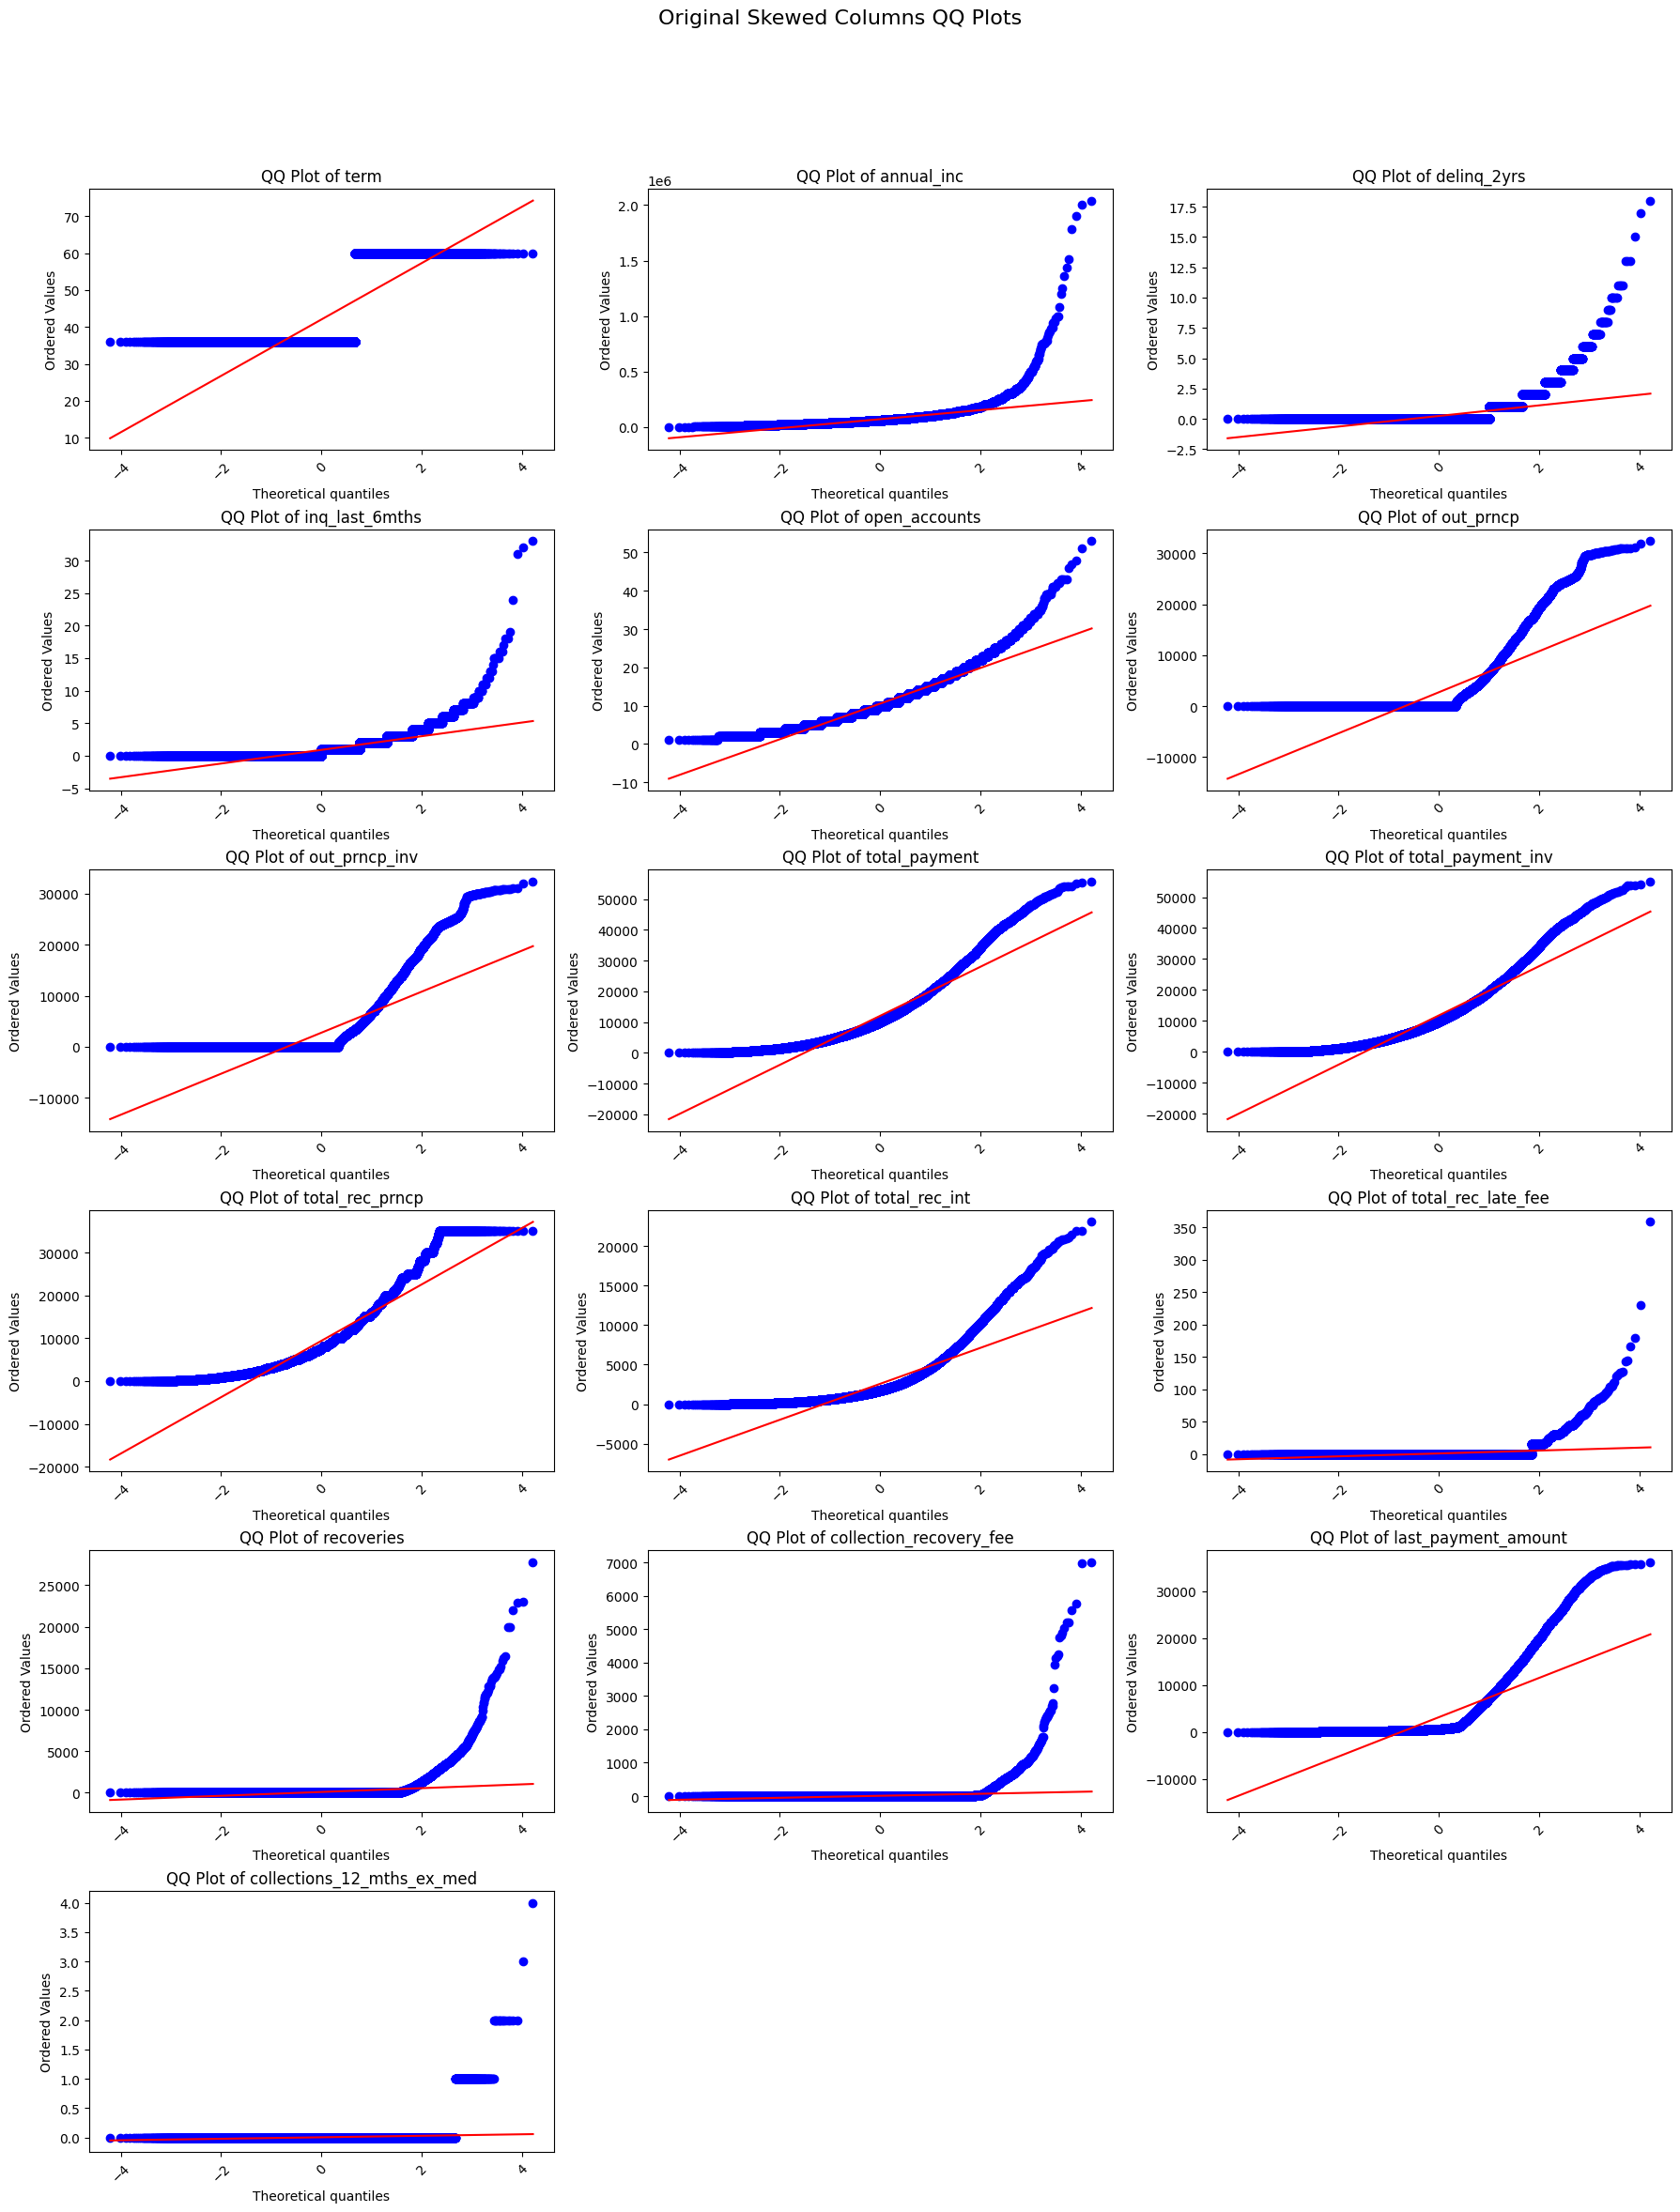

Skewness transformed data saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\skewness_transformed_loan_payments.csv


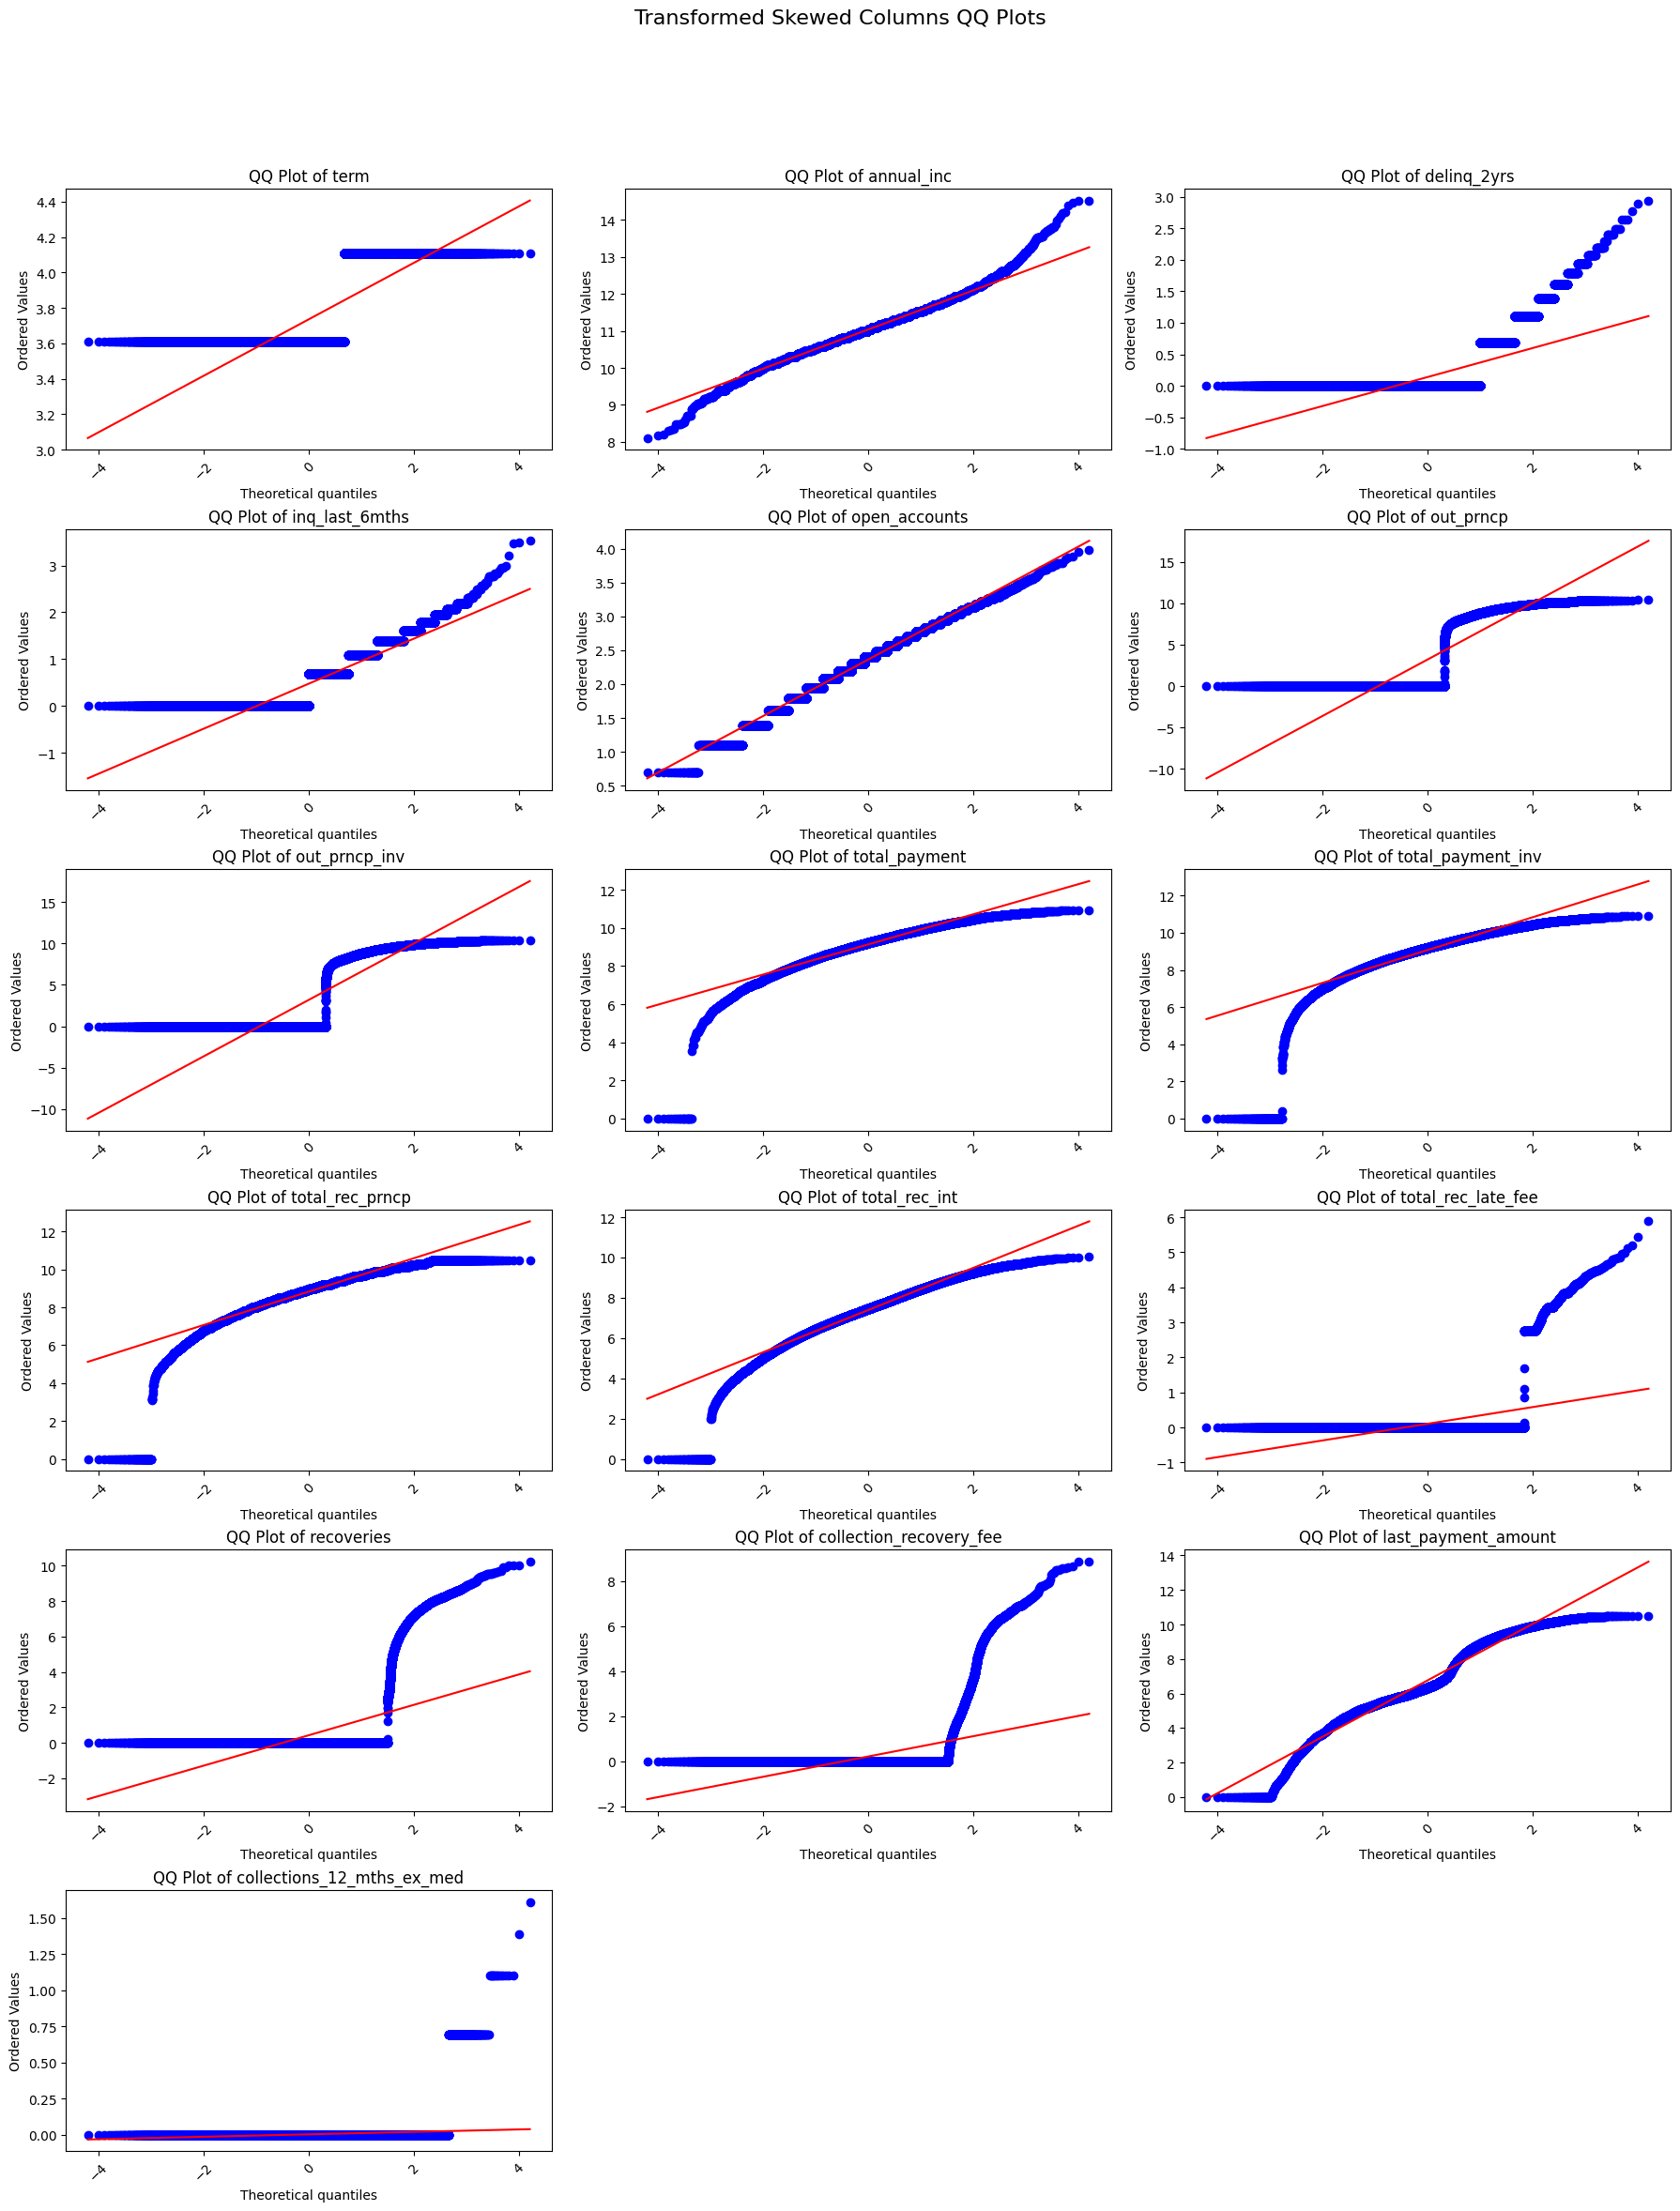

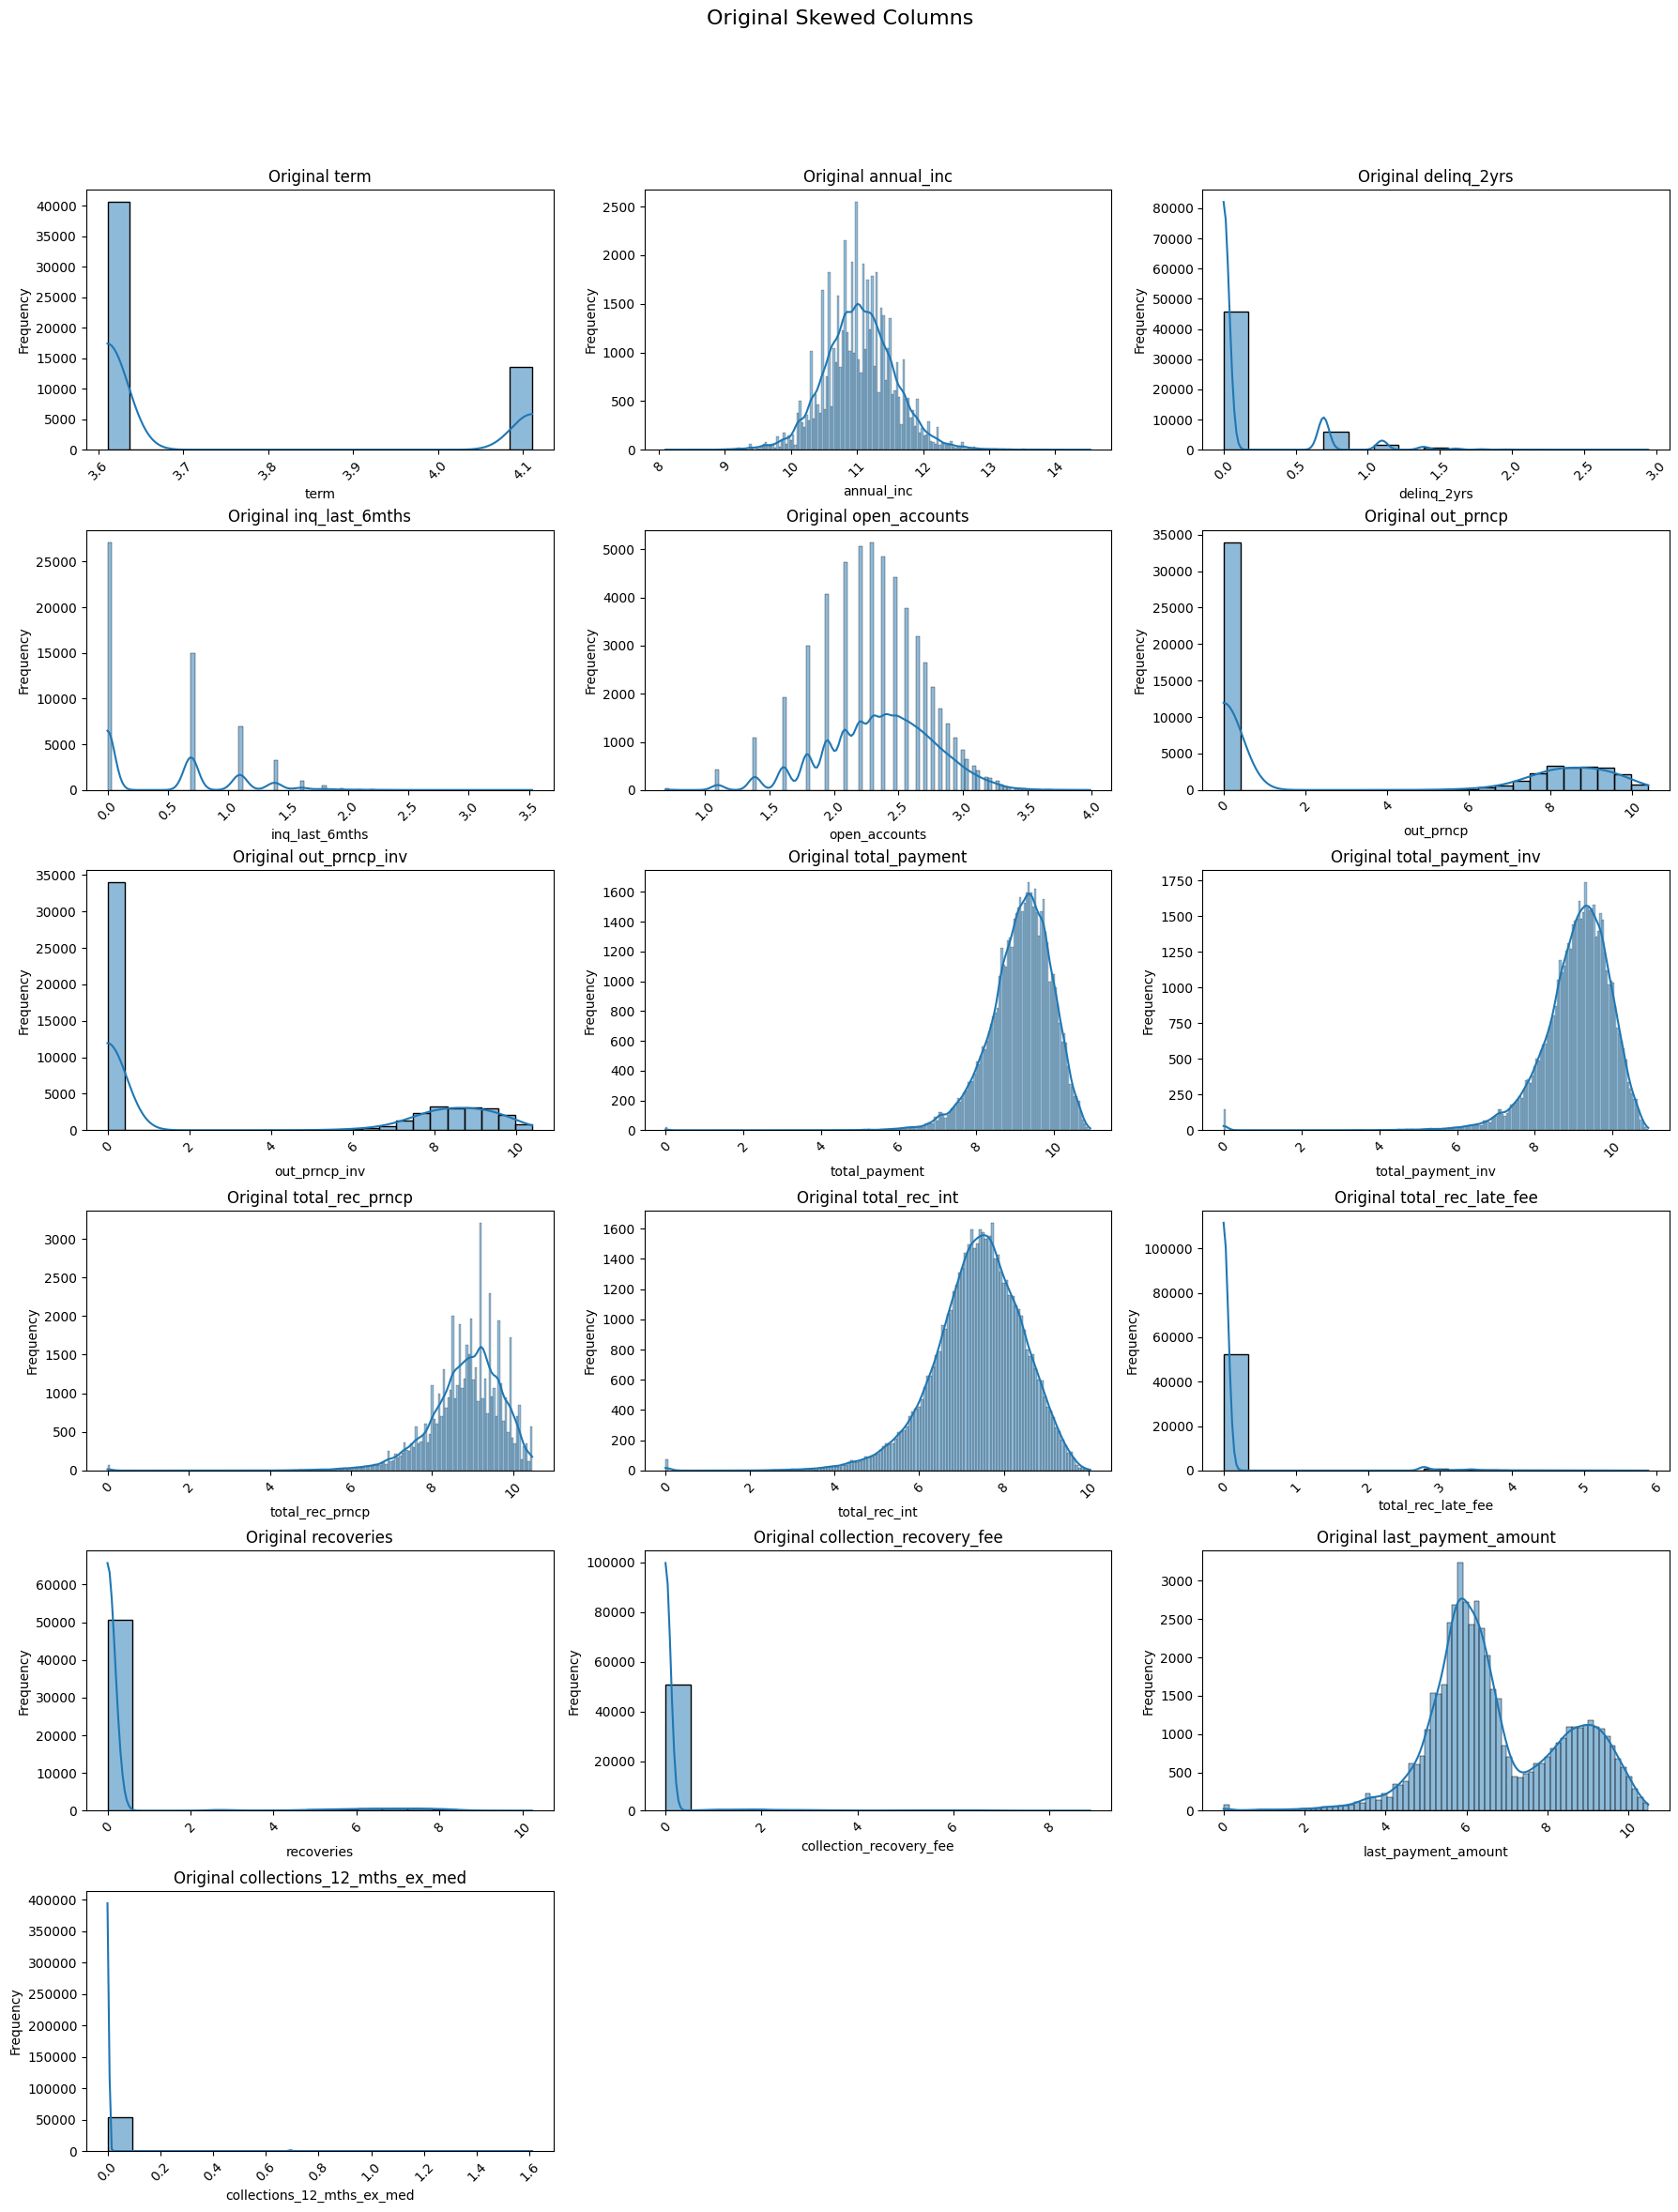

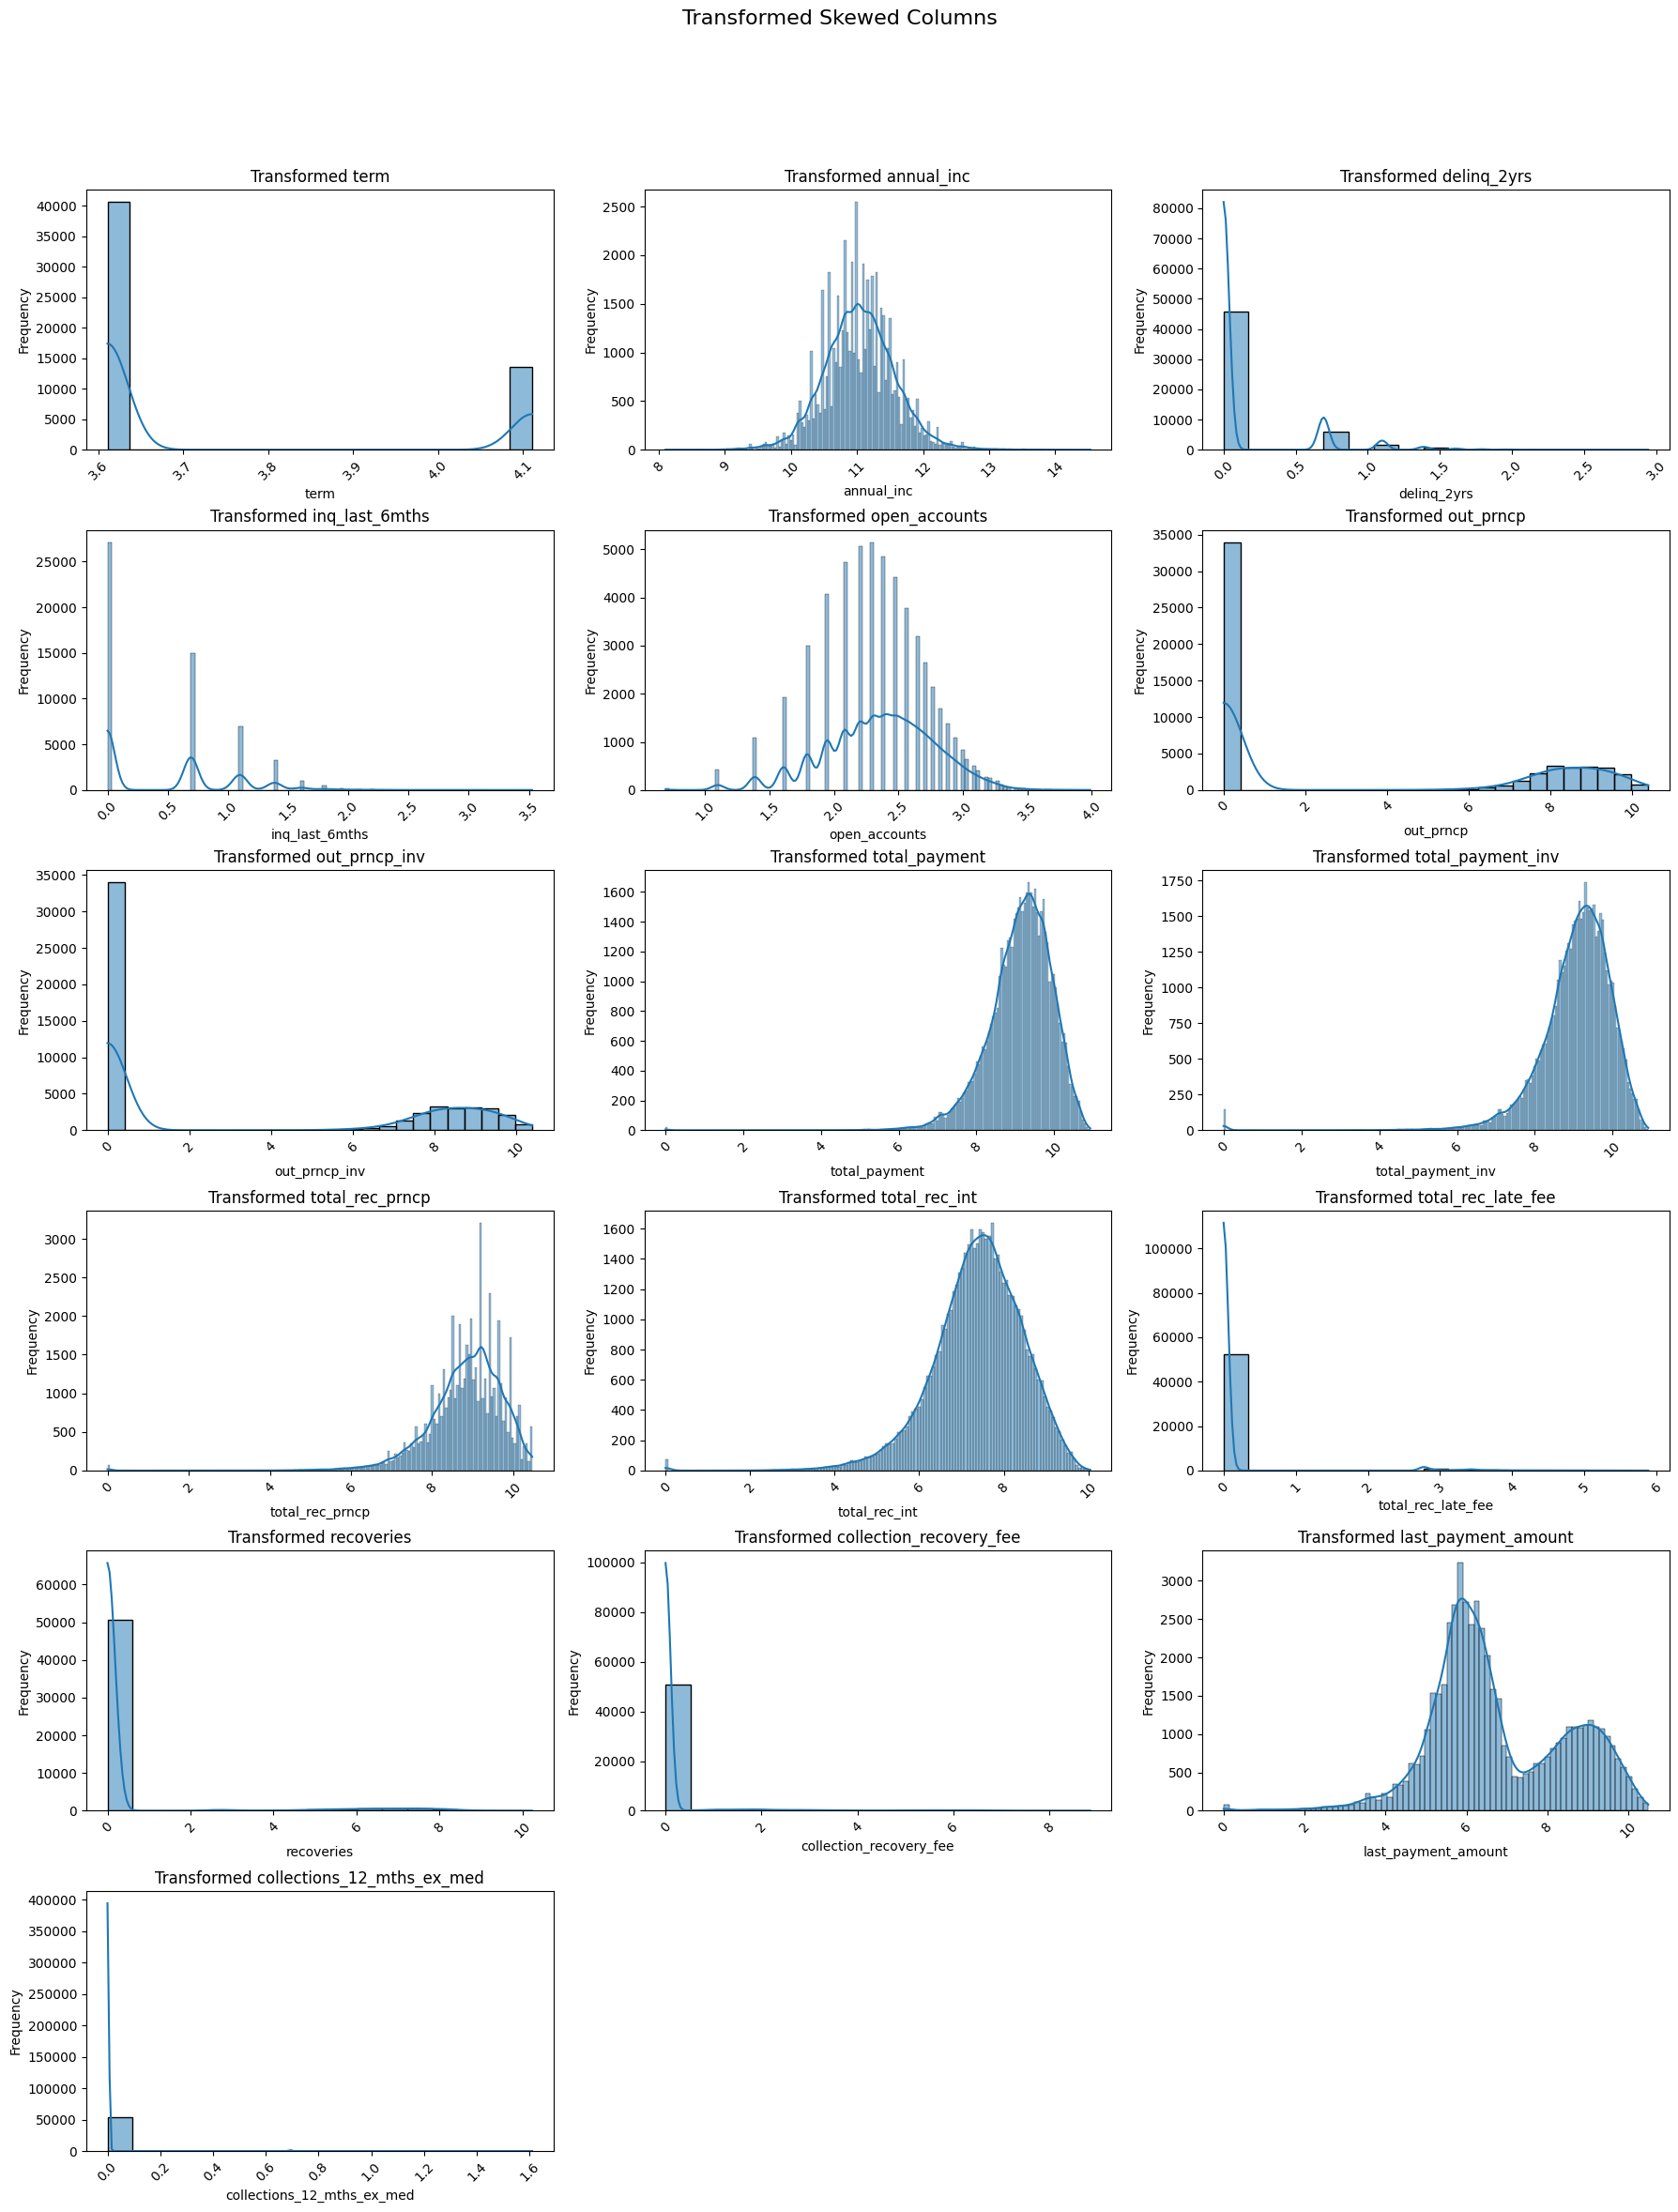

In [4]:
from plotter import Plotter

# Initialize Plotter with the cleaned DataFrame
plotter = Plotter(imputed_df)

# Step 1: Identify skewed columns in the cleaned data
skew_threshold = 1  # You can adjust this threshold as needed
df_transform_cleaned = DataFrameTransform(imputed_df)
skewed_columns = df_transform_cleaned.identify_skewed_columns(skew_threshold)
print(f"\nSkewed Columns (Threshold > {skew_threshold}):\n", skewed_columns)

# Initialize Plotter to visualize skewed columns
plotter = Plotter(imputed_df)

# Visualize skewed columns using QQ plots
if not skewed_columns.empty:
    plotter.plot_qq_plots(skewed_columns.index, title="Original Skewed Columns QQ Plots")
else:
    print("No skewed columns found with the given threshold.")

# Step 2: Transform skewed columns to reduce skewness
df_transform_cleaned.transform_skewed_columns(skew_threshold)

# Access the transformed DataFrame
transformed_skewed_df = df_transform_cleaned.df

# Save the transformed DataFrame after skewness reduction
skewness_transformed_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\skewness_transformed_loan_payments.csv'
transformed_skewed_df.to_csv(skewness_transformed_csv_file_path, index=False)
print(f"Skewness transformed data saved to {skewness_transformed_csv_file_path}")

# Step 4: Visualize the results of the transformations using QQ plots
transformed_skewed_df = pd.read_csv(skewness_transformed_csv_file_path)
plotter = Plotter(transformed_skewed_df)

# Visualize the transformed skewed columns using QQ plots
if not skewed_columns.empty:
    plotter.plot_qq_plots(skewed_columns.index, title="Transformed Skewed Columns QQ Plots")
else:
    print("No skewed columns found with the given threshold.")

# Plot comparison of skewness before and after transformation using histograms
if not skewed_columns.empty:
    plotter.plot_skewness_comparison(original_df=imputed_df, transformed_df=transformed_skewed_df, columns=skewed_columns.index)
else:
    print("No skewed columns found with the given threshold.")


### Task 5: Remove Outliers from the Data

We will identify and remove outliers using the IQR method.


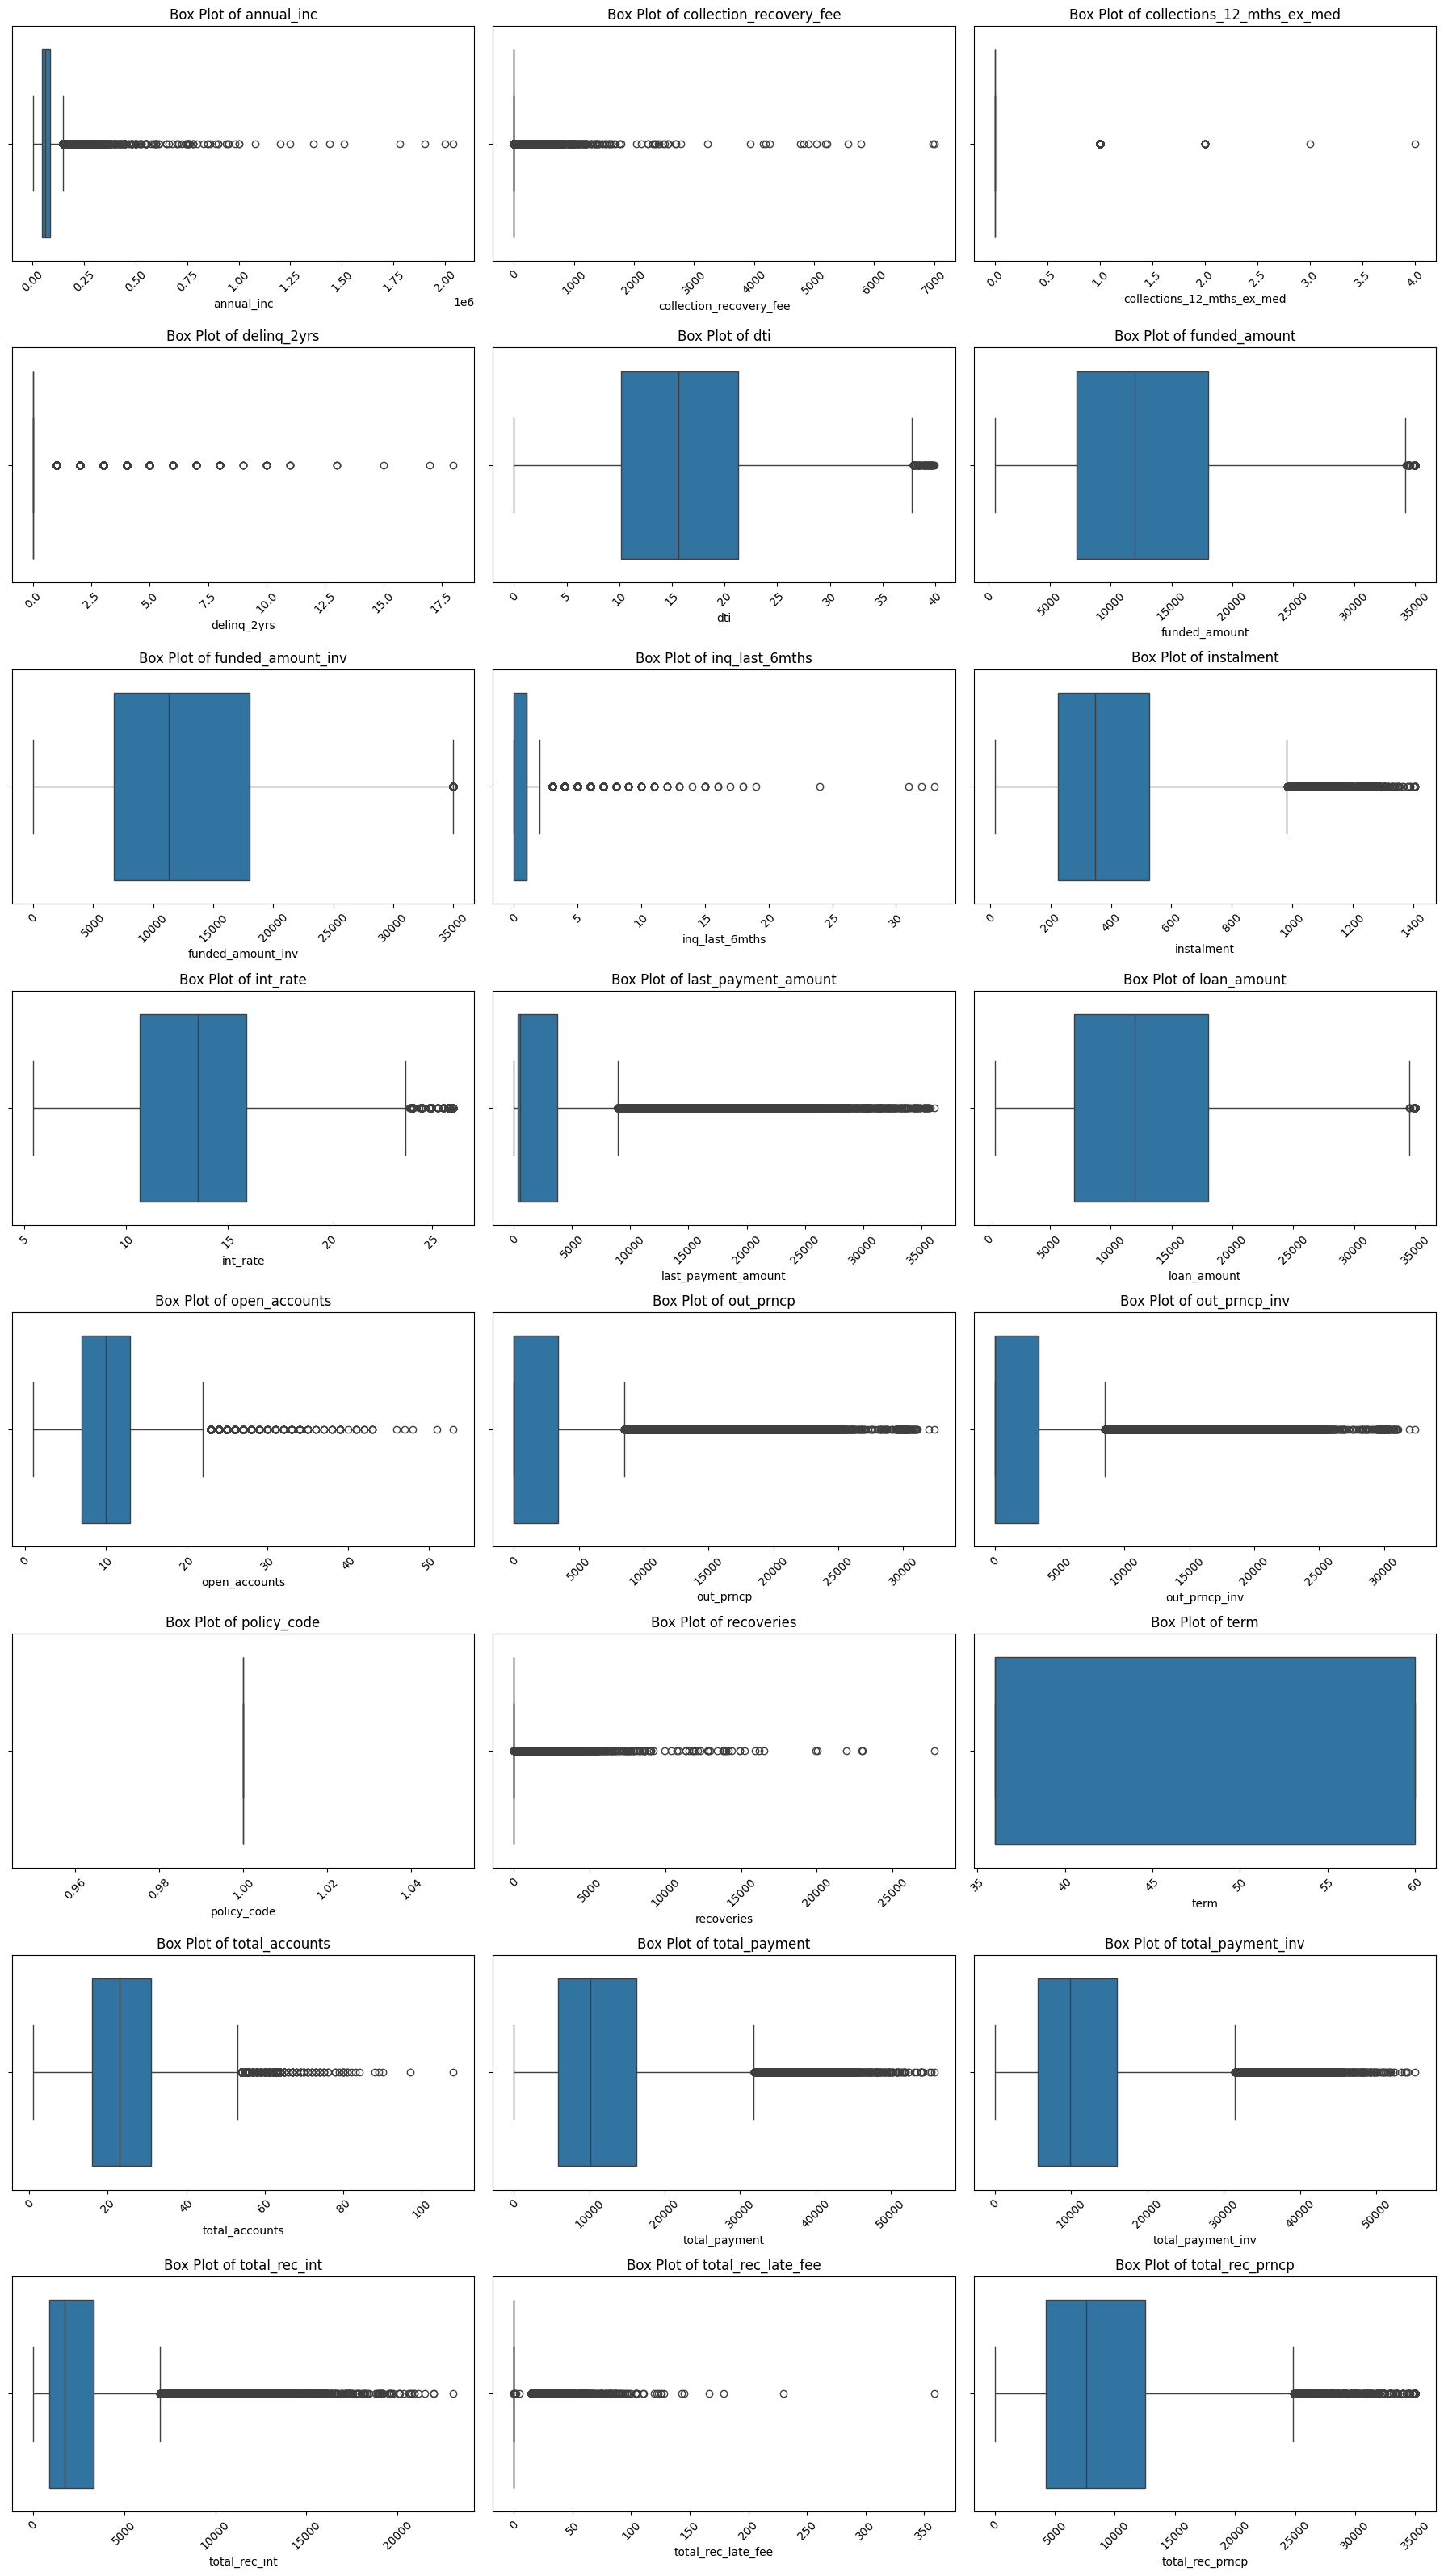

Data with outliers removed saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\outliers_removed_loan_payments.csv


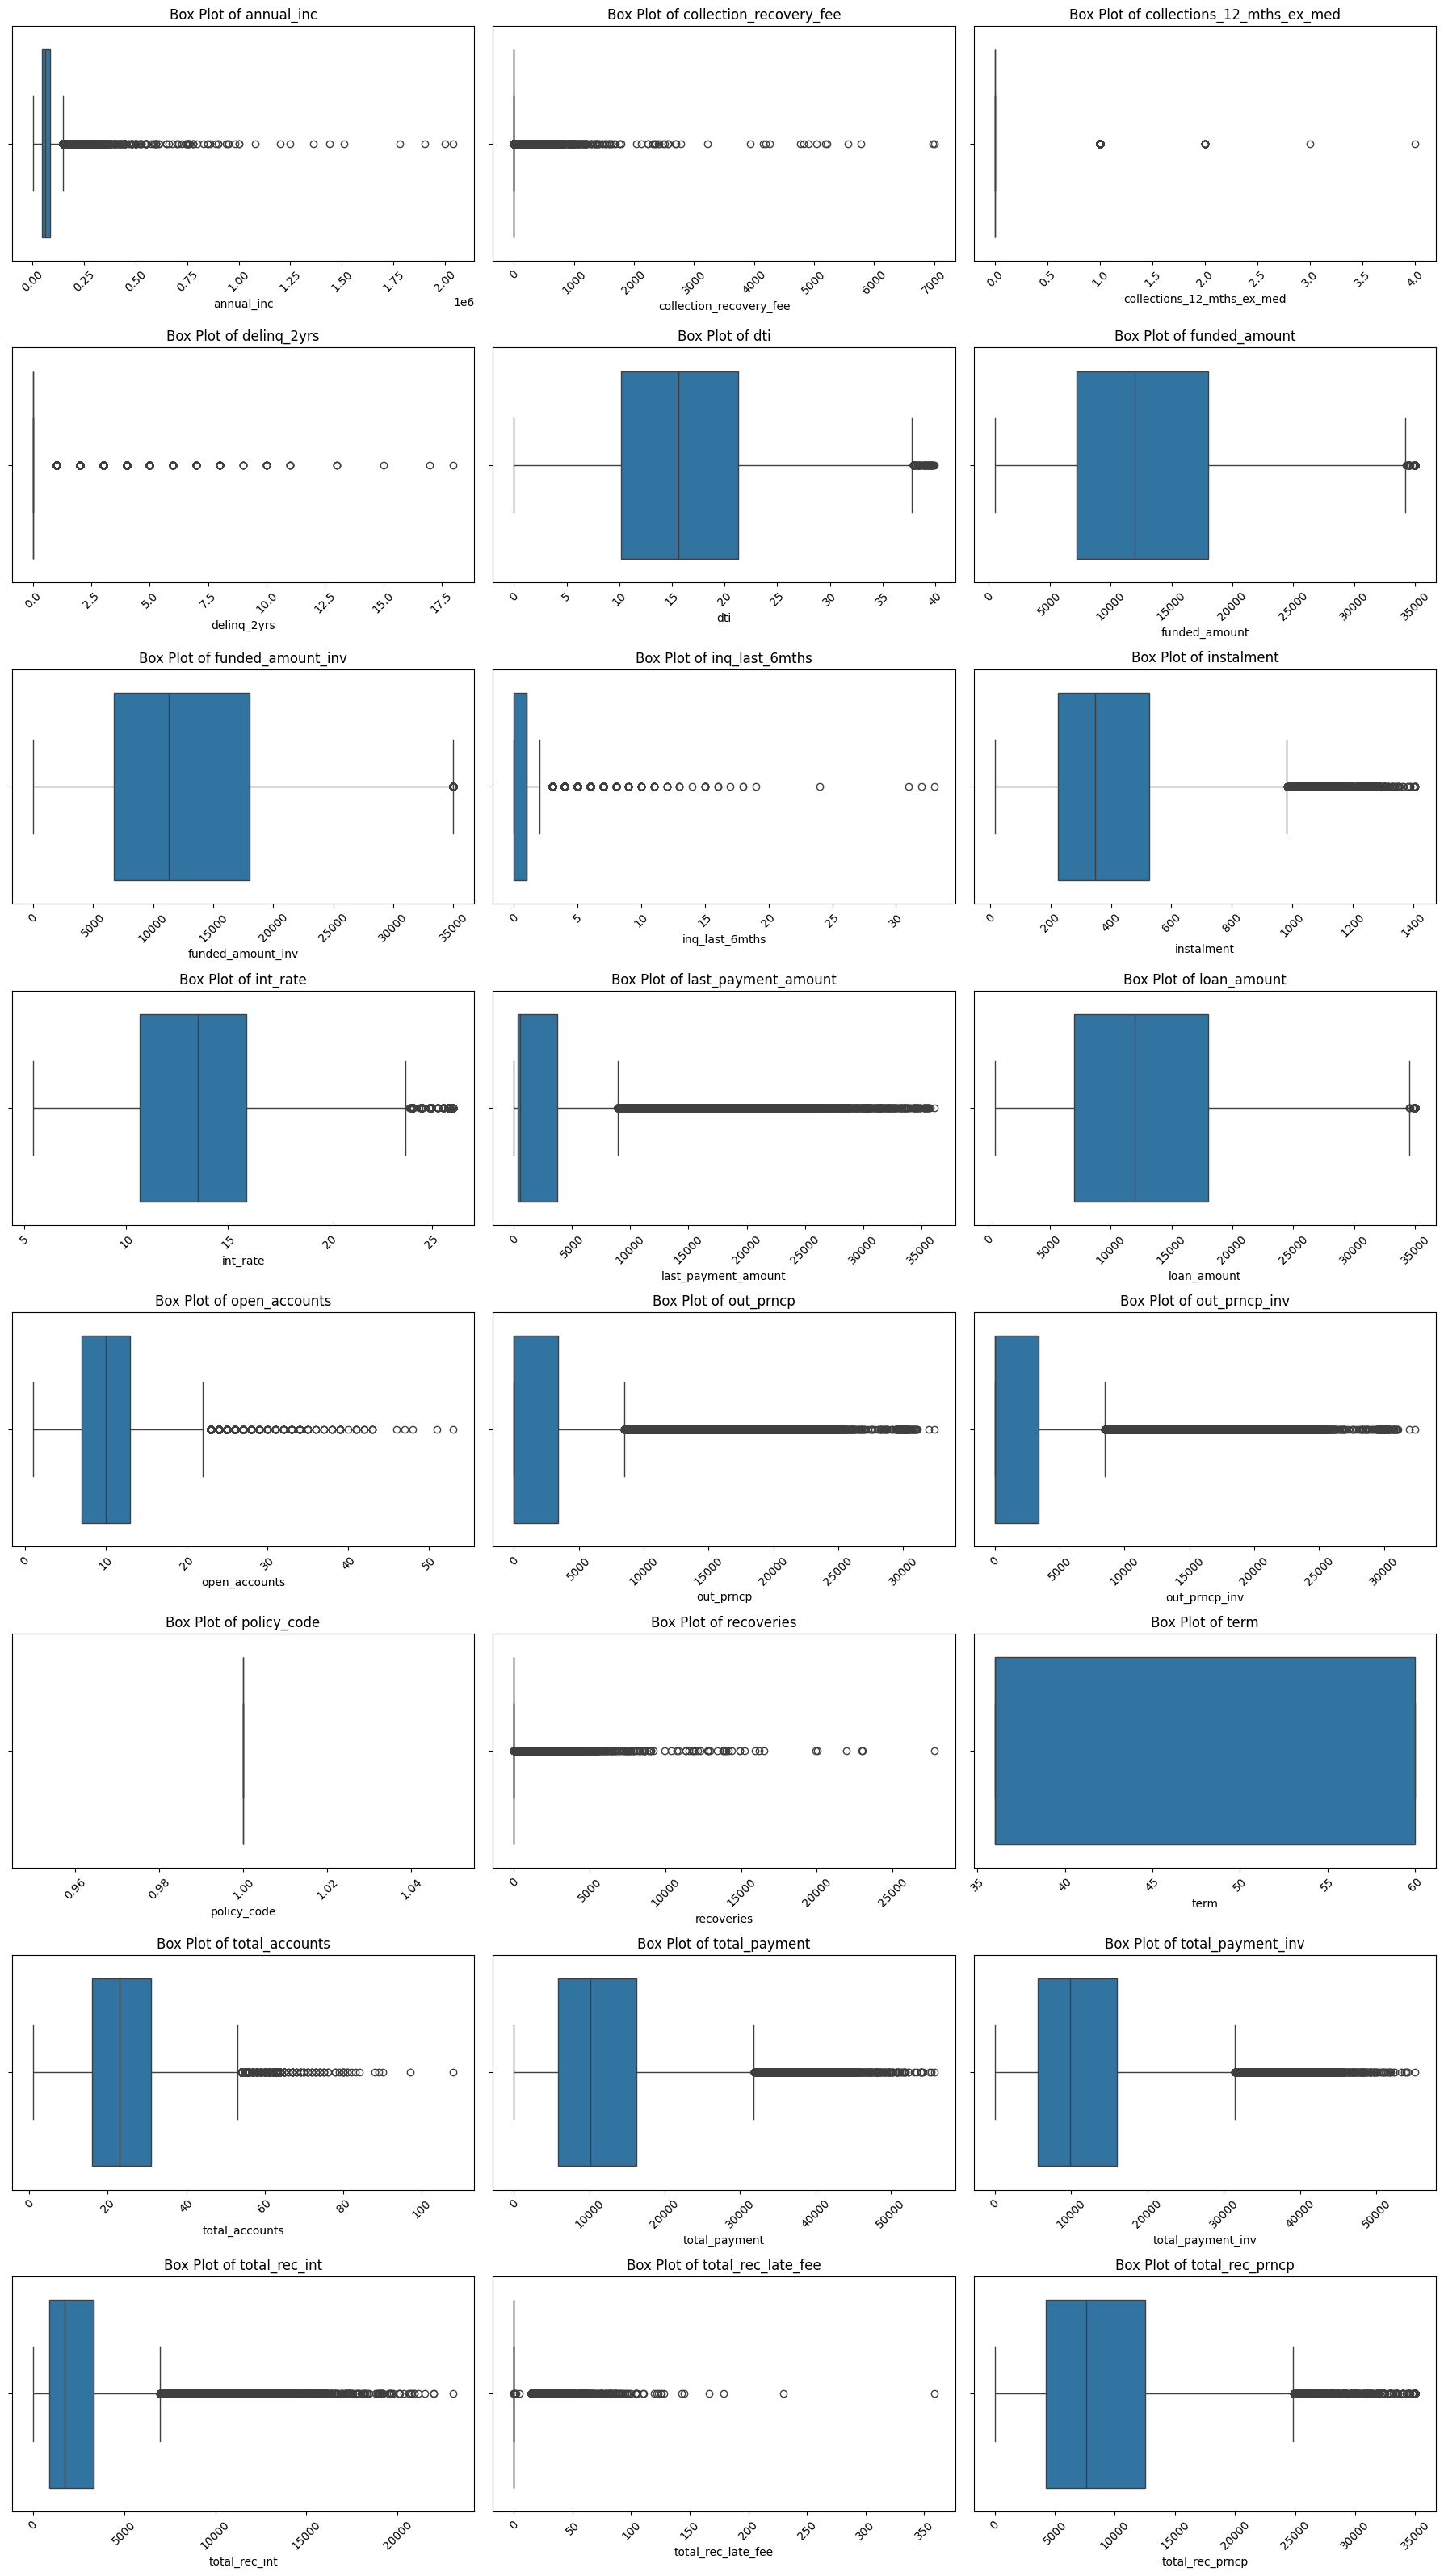

In [5]:
from dataframe_transform import DataFrameTransform
from plotter import Plotter

# Load the cleaned CSV file
df_no_outliers = pd.read_csv(cleaned_csv_file_path)

# Initialize Plotter with the cleaned DataFrame
plotter_no_outliers = Plotter(df_no_outliers)

# Step 1: Visualize data to identify outliers
numeric_columns = df_no_outliers.select_dtypes(include='number').columns.difference(['id', 'member_id'])
plotter_no_outliers.plot_boxplot(numeric_columns)

# Step 2: Remove outliers
df_transform_no_outliers = DataFrameTransform(df_no_outliers)
df_no_outliers = df_transform_no_outliers.remove_outliers(numeric_columns)

# Save the DataFrame with outliers removed back to CSV
outliers_removed_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\outliers_removed_loan_payments.csv'
df_no_outliers.to_csv(outliers_removed_csv_file_path, index=False)
print(f"Data with outliers removed saved to {outliers_removed_csv_file_path}")

# Step 3: Re-visualize the data to ensure outliers are removed
plotter_no_outliers.plot_boxplot(numeric_columns)


### Task 6: Drop Overly Correlated Columns

We will identify and remove highly correlated columns to improve the quality of the data.


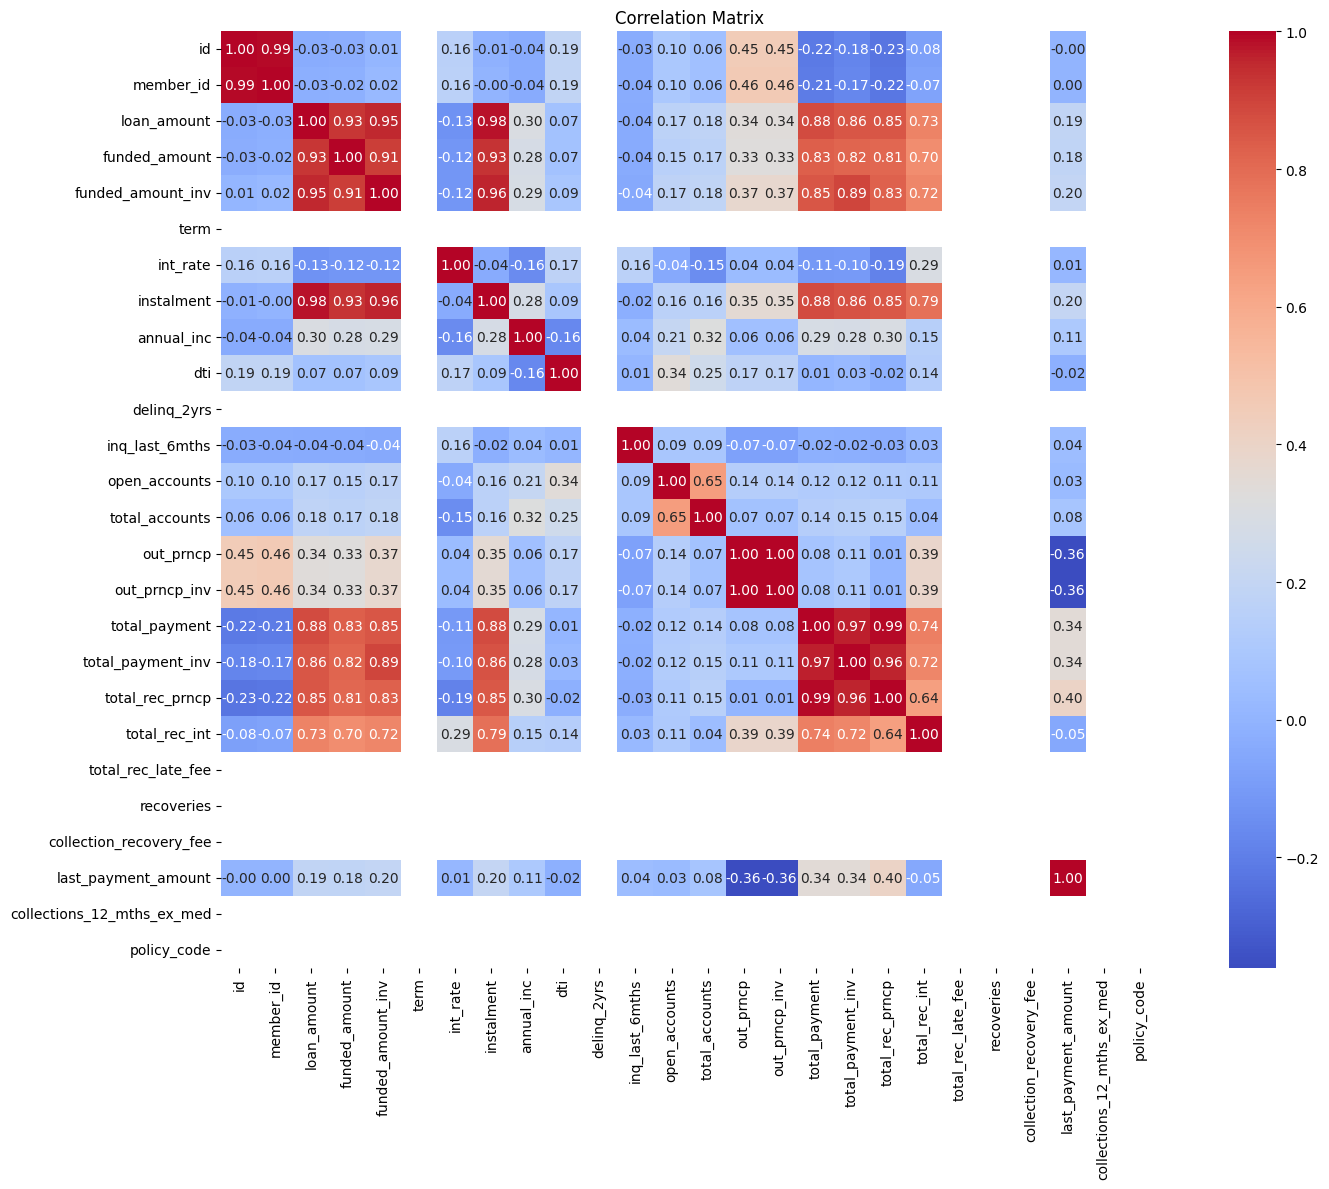

Highly correlated columns (Threshold > 0.9):
 ['instalment', 'total_payment_inv', 'member_id', 'funded_amount', 'total_rec_prncp', 'out_prncp_inv', 'funded_amount_inv']
Column 'member_id' is highly correlated with 'id' (correlation = 0.99).
Column 'funded_amount' is highly correlated with 'loan_amount' (correlation = 0.93).
Column 'funded_amount_inv' is highly correlated with 'loan_amount' (correlation = 0.95).
Column 'funded_amount_inv' is highly correlated with 'funded_amount' (correlation = 0.91).
Column 'instalment' is highly correlated with 'loan_amount' (correlation = 0.98).
Column 'instalment' is highly correlated with 'funded_amount' (correlation = 0.93).
Column 'instalment' is highly correlated with 'funded_amount_inv' (correlation = 0.96).
Column 'out_prncp_inv' is highly correlated with 'out_prncp' (correlation = 1.00).
Column 'total_payment_inv' is highly correlated with 'total_payment' (correlation = 0.97).
Column 'total_rec_prncp' is highly correlated with 'total_payment'

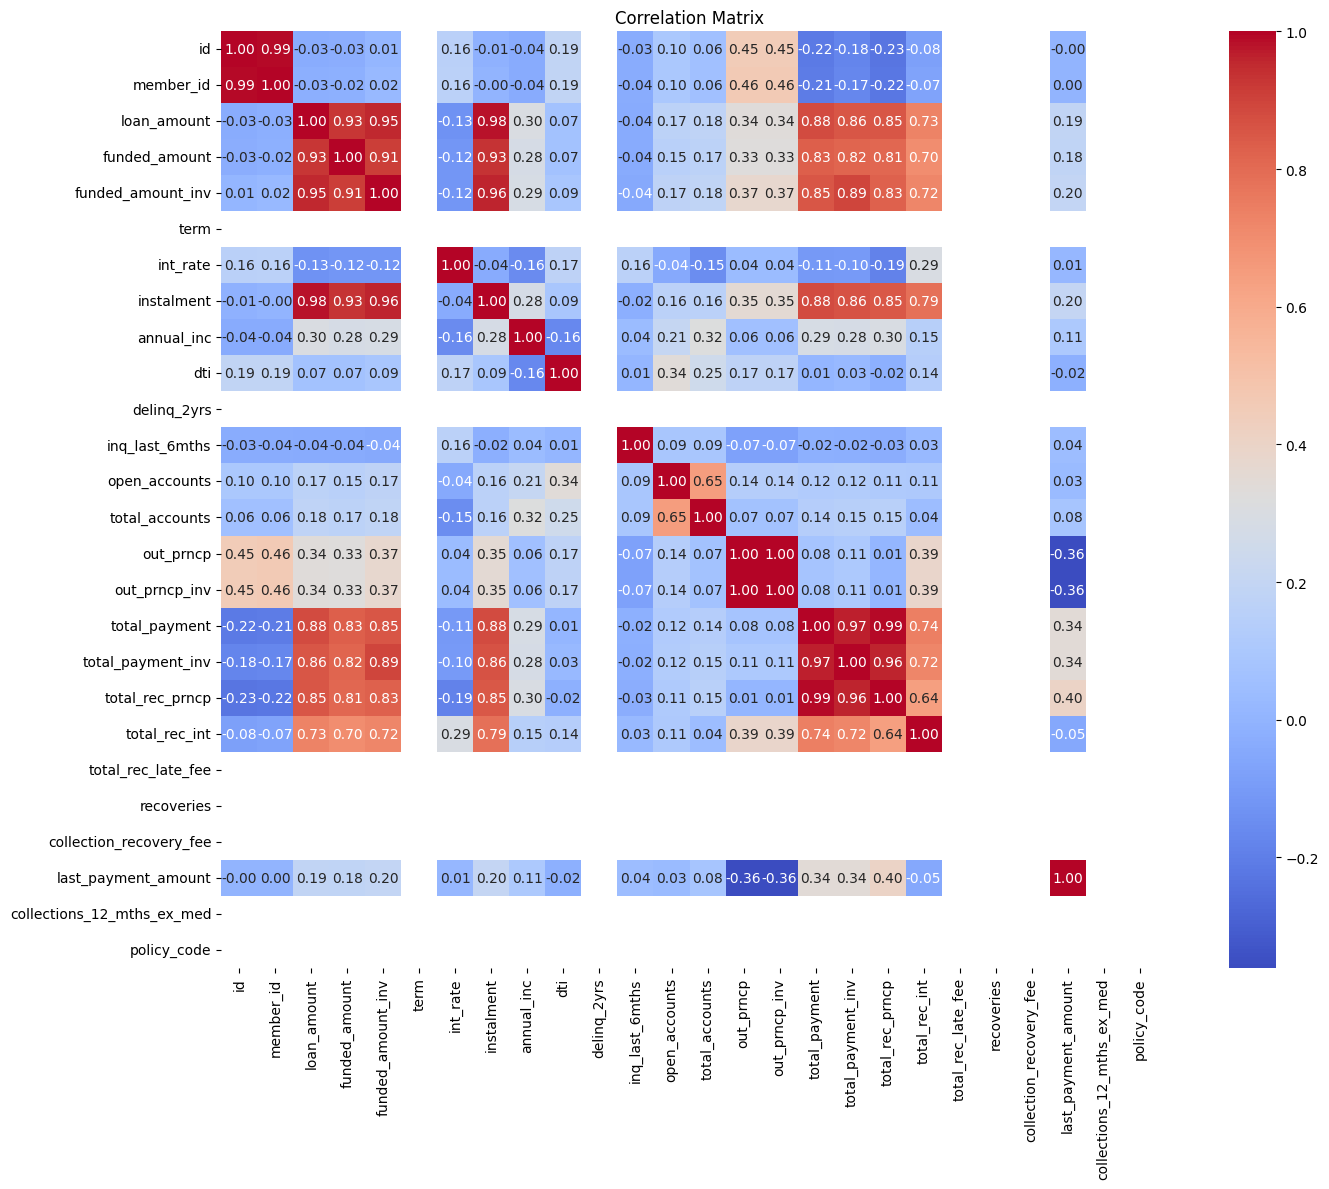

Highly correlated columns (Threshold > 0.9):
 ['instalment', 'total_payment_inv', 'member_id', 'funded_amount', 'total_rec_prncp', 'out_prncp_inv', 'funded_amount_inv']
Data with highly correlated columns removed saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\cleaned_loan_payments_no_correlated.csv


In [6]:
from correlation_analysis import CorrelationAnalysis

# Load the CSV file with outliers removed
df = pd.read_csv(outliers_removed_csv_file_path)

# Initialize CorrelationAnalysis with the DataFrame and a correlation threshold
threshold = 0.9
correlation_analysis = CorrelationAnalysis(df, threshold)

# Step 1: Compute the correlation matrix
correlation_matrix = correlation_analysis.compute_correlation_matrix()

# Step 2: Visualize the correlation matrix
correlation_analysis.visualize_correlation_matrix(correlation_matrix)

# Step 3: Identify highly correlated columns
highly_correlated_columns = correlation_analysis.identify_highly_correlated_columns(correlation_matrix)
print(f"Highly correlated columns (Threshold > {threshold}):\n", highly_correlated_columns)

# Step 4: Remove highly correlated columns from the dataset
cleaned_df = correlation_analysis.remove_highly_correlated_columns(highly_correlated_columns)

# Save the cleaned DataFrame back to CSV
cleaned_csv_output_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments_no_correlated.csv'
cleaned_df.to_csv(cleaned_csv_output_file_path, index=False)
print(f"Data with highly correlated columns removed saved to {cleaned_csv_output_file_path}")


## Analysis and visualization

### Task 1:  Current State of the loans

Columns in dataset: Index(['id', 'loan_amount', 'funded_amount', 'term', 'int_rate', 'grade',
       'sub_grade', 'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'total_payment', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_payment_date', 'last_payment_amount', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'policy_code', 'application_type'],
      dtype='object')
Total Loan Amount: $302,123,075.00
Total Recovered Amount: $243,329.11
Percentage of Loans Recovered: 0.08%
Sizes for pie chart: [243329.11379303396, 301879745.886207]


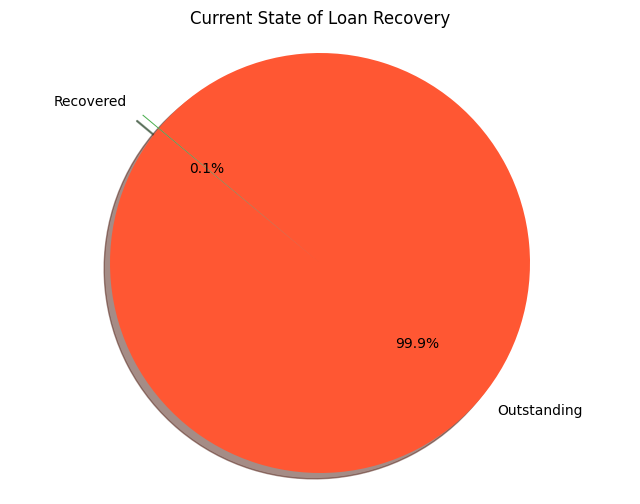

Sample 'last_payment_date' values before conversion:
0    2022-01-05
1    2021-10-05
2    2021-06-05
3    2022-01-05
4    2022-01-05
5    2022-01-05
6    2022-01-05
7    2022-01-05
8    2022-01-05
9    2022-01-05
Name: last_payment_date, dtype: object
Sample 'last_payment_date' values after conversion:
0   2022-01-05
1   2021-10-05
2   2021-06-05
3   2022-01-05
4   2022-01-05
5   2022-01-05
6   2022-01-05
7   2022-01-05
8   2022-01-05
9   2022-01-05
Name: last_payment_date, dtype: datetime64[ns]
Sizes for projected recovery pie chart: [243329.11379303396, 15465.833503794533, 301864280.0527032]


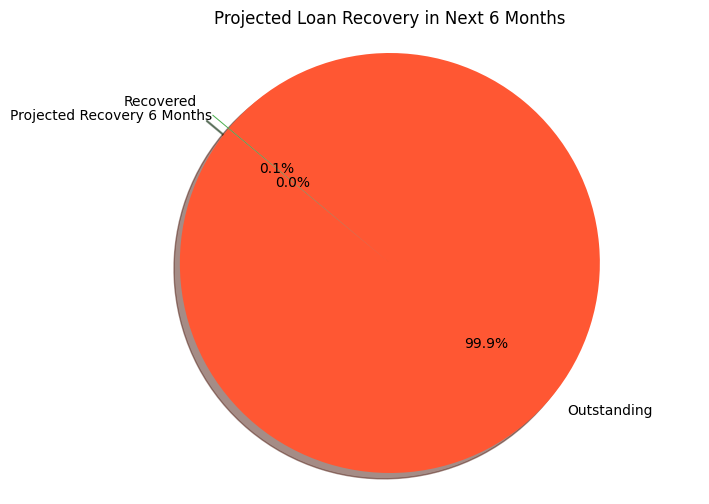

In [1]:
# loan_analysis.py

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
cleaned_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments_no_correlated.csv'
df = pd.read_csv(cleaned_csv_file_path)

# Check if the 'loan_amount' and 'total_payment' columns are present
print("Columns in dataset:", df.columns)
if 'loan_amount' not in df.columns:
    raise KeyError("The 'loan_amount' column is missing from the dataset.")
if 'total_payment' not in df.columns:
    raise KeyError("The 'total_payment' column is missing from the dataset.")

# Summarize the current state of the loans
total_funded = df['loan_amount'].sum()
total_recovered = df['total_payment'].sum()

# Calculate the percentage of loans recovered
recovered_percentage = (total_recovered / total_funded) * 100

# Print the summary
print(f"Total Loan Amount: ${total_funded:,.2f}")
print(f"Total Recovered Amount: ${total_recovered:,.2f}")
print(f"Percentage of Loans Recovered: {recovered_percentage:.2f}%")

# Visualize the current state of the loans
labels = ['Recovered', 'Outstanding']
sizes = [total_recovered, total_funded - total_recovered]
colors = ['#4CAF50', '#FF5733']
explode = (0.1, 0)

print("Sizes for pie chart:", sizes)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Current State of Loan Recovery')
plt.show()

# Attempt to calculate the projected recovery in the next 6 months
print("Sample 'last_payment_date' values before conversion:")
print(df['last_payment_date'].head(10))  # Inspect the first 10 values for diagnosis

# Convert 'last_payment_date' to datetime format and suppress the warning
with pd.option_context('mode.chained_assignment', None):
    df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], errors='coerce')

print("Sample 'last_payment_date' values after conversion:")
print(df['last_payment_date'].head(10))  # Inspect the first 10 values after conversion

if df['last_payment_date'].notna().sum() > 0:
    # Calculate the projected recovery if valid dates are available
    monthly_recovery_rate = total_recovered / (df['last_payment_date'].max() - df['last_payment_date'].min()).days * 30
    projected_recovery_6_months = monthly_recovery_rate * 6

    if projected_recovery_6_months < 0 or pd.isna(projected_recovery_6_months):
        projected_recovery_6_months = 0

    # Visualize the projected recovery
    labels = ['Recovered', 'Projected Recovery 6 Months', 'Outstanding']
    sizes = [total_recovered, projected_recovery_6_months, total_funded - total_recovered - projected_recovery_6_months]
    colors = ['#4CAF50', '#FFD700', '#FF5733']
    explode = (0.1, 0, 0)

    print("Sizes for projected recovery pie chart:", sizes)

    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title('Projected Loan Recovery in Next 6 Months')
    plt.show()
else:
    print("No valid 'last_payment_date' available for projections. Skipping the projected recovery visualization.")


### Task 2: Calculating Loss

The company wants to check what percentage of loans have been a loss to the company.

Loans marked as **Charged Off** in the `loan_status` column represent a loss to the company.


If the company wants to check what percentage of loans have been a loss to the company: Loans marked as Charged Off in the loan_status column represent a loss to the company. In the following Calculates the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

Columns in dataset: Index(['id', 'loan_amount', 'funded_amount', 'term', 'int_rate', 'grade',
       'sub_grade', 'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'total_payment', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_payment_date', 'last_payment_amount', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'policy_code', 'application_type'],
      dtype='object')
Total number of loans: 26621
Number of charged off loans: 720
Percentage of charged off loans: 2.70%
Total amount paid towards charged off loans: $6,156.06


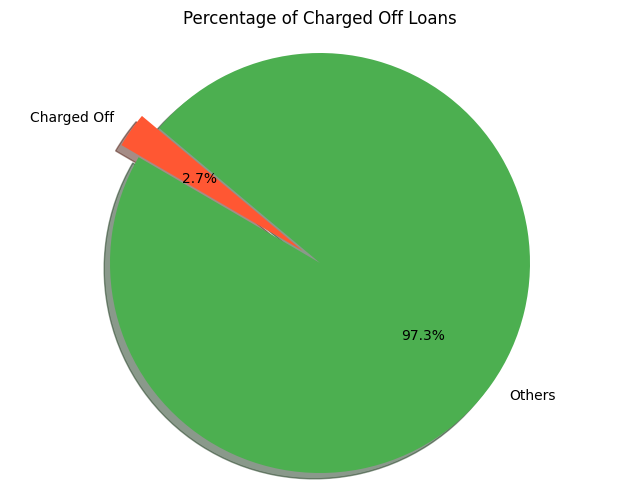

In [2]:
# loan_loss_analysis.py

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
cleaned_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments_no_correlated.csv'
df = pd.read_csv(cleaned_csv_file_path)

# Check if the required columns are present
required_columns = ['loan_status', 'loan_amount', 'total_payment']
print("Columns in dataset:", df.columns)
for column in required_columns:
    if column not in df.columns:
        raise KeyError(f"The '{column}' column is missing from the dataset.")

# Filter loans that are marked as 'Charged Off'
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Calculate the percentage of charged off loans
total_loans = len(df)
charged_off_loans_count = len(charged_off_loans)
charged_off_percentage = (charged_off_loans_count / total_loans) * 100

# Calculate the total amount paid towards charged off loans before being charged off
total_paid_charged_off = charged_off_loans['total_payment'].sum()

# Print the results
print(f"Total number of loans: {total_loans}")
print(f"Number of charged off loans: {charged_off_loans_count}")
print(f"Percentage of charged off loans: {charged_off_percentage:.2f}%")
print(f"Total amount paid towards charged off loans: ${total_paid_charged_off:,.2f}")

# Visualize the percentage of charged off loans
labels = ['Charged Off', 'Others']
sizes = [charged_off_loans_count, total_loans - charged_off_loans_count]
colors = ['#FF5733', '#4CAF50']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Charged Off Loans')
plt.show()


### Task 3: Calculating Projected Loss

Calculate the projected loss of the loans marked as **Charged Off**.

Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualize the loss projected over the remaining term of these loans.

Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

To calculate the projected loss of the loans marked as **Charged Off**, we need to estimate the potential revenue that these loans would have generated if they had completed their term. The projected loss can be calculated based on the interest that would have been accrued over the remaining term.


Columns in dataset: Index(['id', 'loan_amount', 'funded_amount', 'term', 'int_rate', 'grade',
       'sub_grade', 'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'total_payment', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_payment_date', 'last_payment_amount', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'policy_code', 'application_type'],
      dtype='object')
Total projected loss from charged off loans: $359,383.07


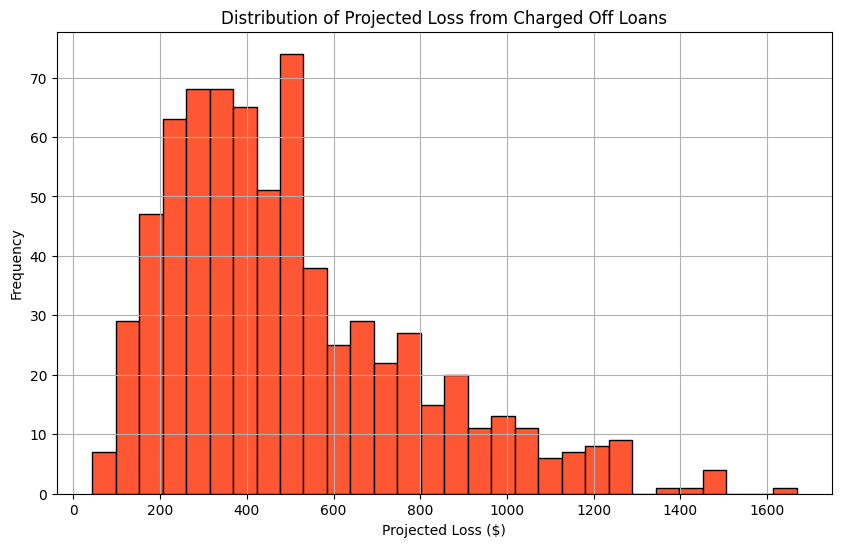

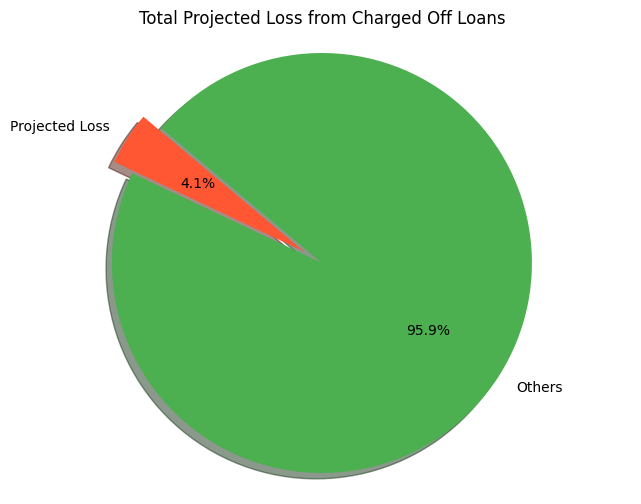

In [3]:
# loan_projected_loss_analysis.py

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
cleaned_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments_no_correlated.csv'
df = pd.read_csv(cleaned_csv_file_path)

# Check if the required columns are present
required_columns = ['loan_status', 'loan_amount', 'term', 'int_rate', 'total_payment']
print("Columns in dataset:", df.columns)
for column in required_columns:
    if column not in df.columns:
        raise KeyError(f"The '{column}' column is missing from the dataset.")

# Filter loans that are marked as 'Charged Off'
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

# Calculate the remaining term for each charged off loan
charged_off_loans.loc[:, 'remaining_term'] = charged_off_loans['term'] - charged_off_loans['total_payment'] / (charged_off_loans['loan_amount'] / charged_off_loans['term'])

# Calculate the projected interest that would have been earned if the loan had completed its term
charged_off_loans.loc[:, 'projected_interest'] = charged_off_loans.apply(
    lambda row: (row['loan_amount'] * row['int_rate'] / 100) / 12 * row['remaining_term'], axis=1
)

# Calculate the total projected loss
total_projected_loss = charged_off_loans['projected_interest'].sum()

# Print the results
print(f"Total projected loss from charged off loans: ${total_projected_loss:,.2f}")

# Visualize the projected loss over the remaining term of the charged off loans
plt.figure(figsize=(10, 6))
plt.hist(charged_off_loans['projected_interest'], bins=30, color='#FF5733', edgecolor='black')
plt.title('Distribution of Projected Loss from Charged Off Loans')
plt.xlabel('Projected Loss ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize the total projected loss
labels = ['Projected Loss', 'Others']
sizes = [total_projected_loss, charged_off_loans['loan_amount'].sum() - total_projected_loss]
colors = ['#FF5733', '#4CAF50']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total Projected Loss from Charged Off Loans')
plt.show()


### Task 4: Possible Loss

There are customers who are currently behind with their loan payments. This subset of customers represents a risk to company revenue.

- **What percentage do users in this bracket currently represent as a percentage of all loans?**
- **Calculate the total amount of customers in this bracket and how much loss the company would incur if their status was changed to Charged Off.**
- **What is the projected loss of these loans if the customers were to finish the full loan term?**

If customers late on payments converted to **Charged Off**, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

To address Task 4, we need to identify customers who are behind with their loan payments, calculate the potential losses if their status changes to **Charged Off**, and analyze the overall impact on the company's revenue.


Columns in dataset: Index(['id', 'loan_amount', 'funded_amount', 'term', 'int_rate', 'grade',
       'sub_grade', 'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'total_payment', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_payment_date', 'last_payment_amount', 'last_credit_pull_date',
       'collections_12_mths_ex_med', 'policy_code', 'application_type'],
      dtype='object')
Total number of loans: 26621
Number of late loans: 366
Percentage of late loans: 1.37%
Total amount of late loans: $4,155,500.00
Projected loss if late loans were charged off: $173,793.59
Projected loss if late loans were to finish the full loan term: $173,927.18
Combined loss (already charged off + potentially default

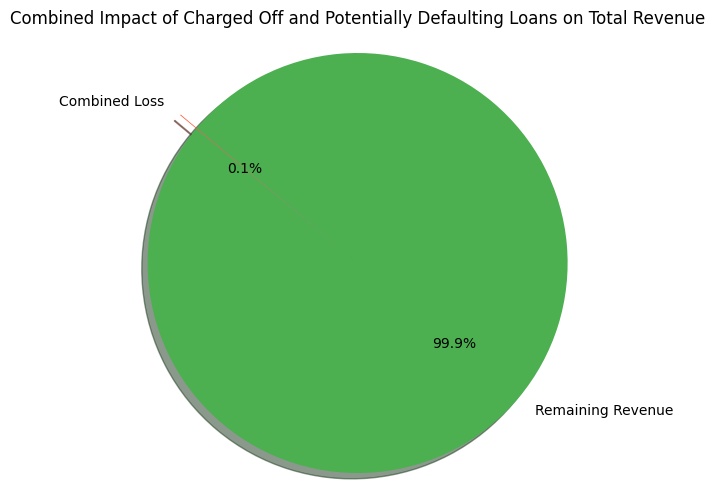

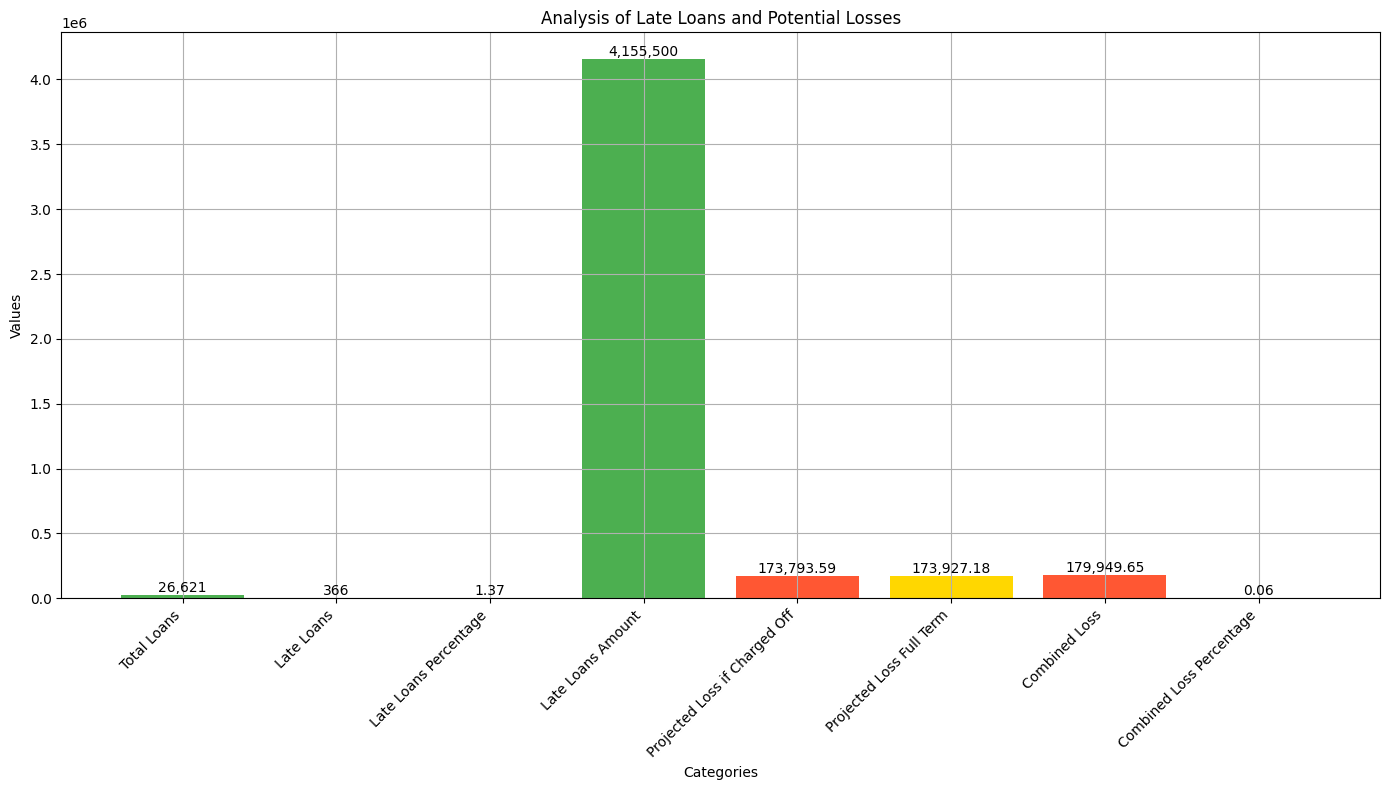

In [4]:
# possible_loss_analysis.py

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned CSV file
cleaned_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments_no_correlated.csv'
df = pd.read_csv(cleaned_csv_file_path)

# Check if the required columns are present
required_columns = ['loan_status', 'loan_amount', 'term', 'int_rate', 'total_payment', 'total_rec_prncp', 'loan_status']
print("Columns in dataset:", df.columns)
for column in required_columns:
    if column not in df.columns:
        raise KeyError(f"The '{column}' column is missing from the dataset.")

# Identify customers behind on their loan payments (e.g., status 'Late (31-120 days)', 'Late (16-30 days)', etc.)
late_statuses = ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']
late_loans = df[df['loan_status'].isin(late_statuses)].copy()

# Calculate the percentage of these users as a percentage of all loans
total_loans = len(df)
late_loans_count = len(late_loans)
late_loans_percentage = (late_loans_count / total_loans) * 100

# Calculate the total amount of these loans
total_late_loans_amount = late_loans['loan_amount'].sum()

# Calculate the projected loss if these loans were to be charged off
late_loans.loc[:, 'projected_interest'] = late_loans.apply(
    lambda row: (row['loan_amount'] * row['int_rate'] / 100) / 12 * (row['term'] - (row['total_rec_prncp'] / row['loan_amount']) * row['term']), axis=1
)
total_projected_loss_if_charged_off = late_loans['projected_interest'].sum()

# Calculate the projected loss if these customers were to finish the full loan term
total_projected_loss_full_term = late_loans.apply(
    lambda row: (row['loan_amount'] * row['int_rate'] / 100) / 12 * row['term'], axis=1
).sum()

# Print the results
print(f"Total number of loans: {total_loans}")
print(f"Number of late loans: {late_loans_count}")
print(f"Percentage of late loans: {late_loans_percentage:.2f}%")
print(f"Total amount of late loans: ${total_late_loans_amount:,.2f}")
print(f"Projected loss if late loans were charged off: ${total_projected_loss_if_charged_off:,.2f}")
print(f"Projected loss if late loans were to finish the full loan term: ${total_projected_loss_full_term:,.2f}")

# Calculate the combined impact of already charged off loans and potentially defaulting loans
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()
charged_off_total_loss = charged_off_loans['total_payment'].sum()
combined_loss_if_charged_off = charged_off_total_loss + total_projected_loss_if_charged_off
total_expected_revenue = df['loan_amount'].sum() + total_projected_loss_full_term
combined_loss_percentage = (combined_loss_if_charged_off / total_expected_revenue) * 100

# Print the combined impact
print(f"Combined loss (already charged off + potentially defaulting): ${combined_loss_if_charged_off:,.2f}")
print(f"Combined loss as a percentage of total expected revenue: {combined_loss_percentage:.2f}%")

# Visualize the combined impact with a pie chart
labels = ['Combined Loss', 'Remaining Revenue']
sizes = [combined_loss_if_charged_off, total_expected_revenue - combined_loss_if_charged_off]
colors = ['#FF5733', '#4CAF50']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Combined Impact of Charged Off and Potentially Defaulting Loans on Total Revenue')
plt.show()

# Visualize the results with an annotated bar chart
categories = ['Total Loans', 'Late Loans', 'Late Loans Percentage', 'Late Loans Amount', 
              'Projected Loss if Charged Off', 'Projected Loss Full Term', 'Combined Loss', 'Combined Loss Percentage']
values = [total_loans, late_loans_count, late_loans_percentage, total_late_loans_amount, 
          total_projected_loss_if_charged_off, total_projected_loss_full_term, combined_loss_if_charged_off, combined_loss_percentage]

plt.figure(figsize=(14, 8))
bars = plt.bar(categories, values, color=['#4CAF50', '#FF5733', '#FFD700', '#4CAF50', '#FF5733', '#FFD700', '#FF5733', '#FFD700'])

# Annotate the bar chart with the values
for bar, value in zip(bars, values):
    yval = round(value, 2)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{yval:,}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Analysis of Late Loans and Potential Losses')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 5: Indicators of Loss

In this task, we will be analyzing the data to visualize the possible indicators that a customer will not be able to pay the loan.

We will compare columns that might be indicators against customers who have already stopped paying and customers who are currently behind on payments.

Here are some example columns that might indicate that a user might not pay the loan:

- **Does the grade of the loan have an effect on customers not paying?**
  - For example, we will analyze if customers with lower grades (e.g., D, E, F, G) are more likely to default compared to those with higher grades (e.g., A, B, C).
  
- **Is the purpose for the loan likely to have an effect?**
  - For instance, we will check if loans taken for certain purposes (e.g., debt consolidation, small business) have higher default rates compared to others (e.g., home improvement, vacation).
  
- **Does the home_ownership value contribute to the likelihood a customer won't pay?**
  - We will investigate if customers who rent or have a mortgage are more likely to default compared to those who own their homes outright.

To help identify which columns will be of interest, we will create a subset of these users.

We will make the analysis and determine the columns contributing to loans not being paid off and visualize any interesting indicators.

We will compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".


Indicator Value  Total Count  Late Count  Charged Off Count  \
grade                                                               
A         grade     A         7481        31.0                105   
B         grade     B         9758       143.0                247   
C         grade     C         5577        90.0                204   
D         grade     D         2878        82.0                129   
E         grade     E          780        20.0                 27   
F         grade     F          120         0.0                  7   
G         grade     G           27         0.0                  1   

       Relative Late Rate (%)  Relative Charged Off Rate (%)  
grade                                                         
A                    0.414383                       1.403556  
B                    1.465464                       2.531256  
C                    1.613771                       3.657881  
D                    2.849201                       4.482279  
E                    2.564103                       3.461538  
F                    0.000000                       5.833333  
G                    0.000000                       3.703704

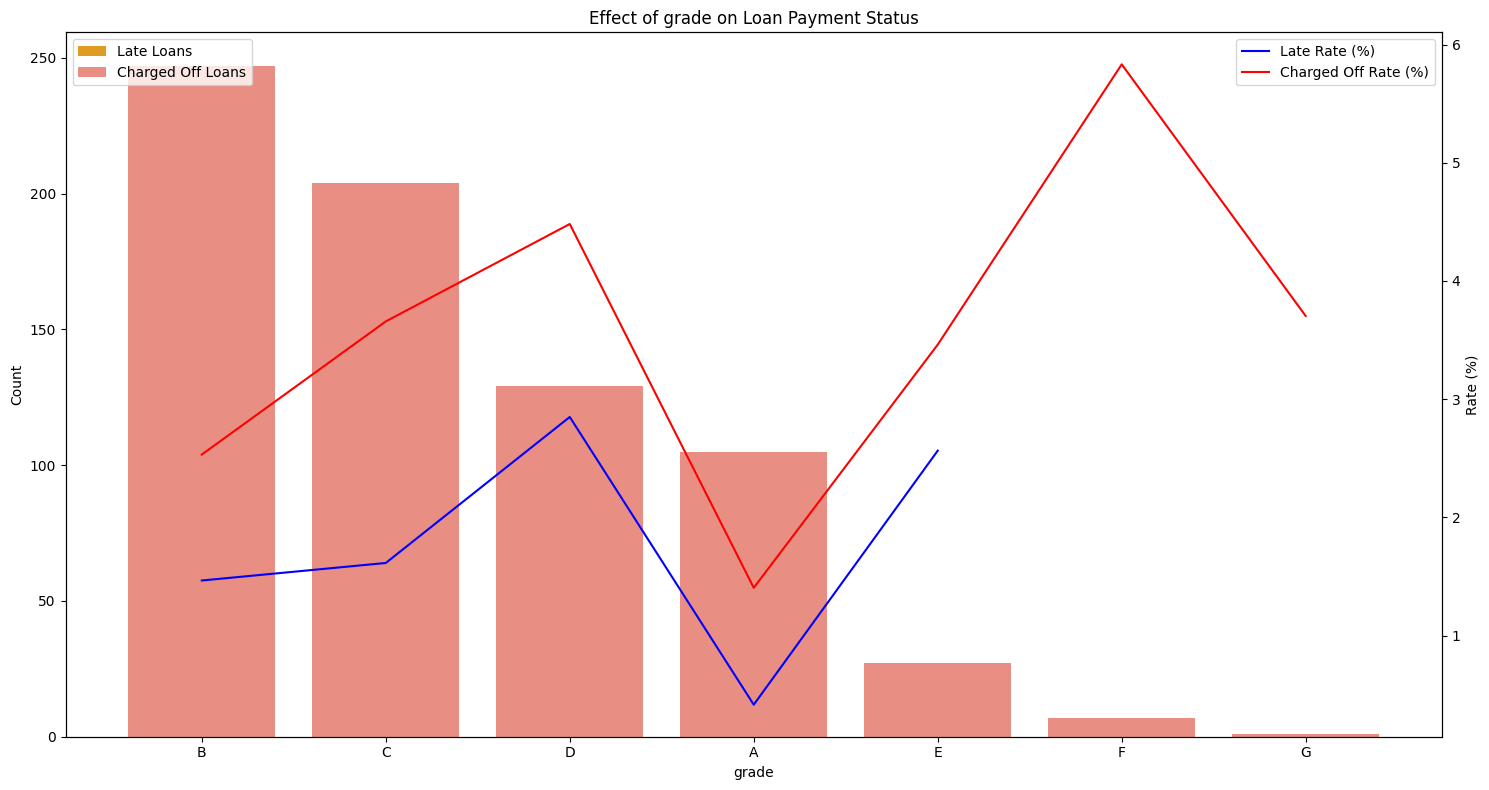

Indicator               Value  Total Count  Late Count  \
purpose                                                                     
car                  purpose                 car          444         1.0   
credit_card          purpose         credit_card         6220        85.0   
debt_consolidation   purpose  debt_consolidation        14295       227.0   
educational          purpose         educational           91         0.0   
home_improvement     purpose    home_improvement         1443        13.0   
house                purpose               house          129         1.0   
major_purchase       purpose      major_purchase          832         4.0   
medical              purpose             medical          283         6.0   
moving               purpose              moving          207         2.0   
other                purpose               other         1700        21.0   
renewable_energy     purpose    renewable_energy           35         0.0   
small_business       purpose      small_business          493         5.0   
vacation             purpose            vacation          151         1.0   
wedding              purpose             wedding          298         0.0   

                    Charged Off Count  Relative Late Rate (%)  \
purpose                                                         
car                               3.0                0.225225   
credit_card                     165.0                1.366559   
debt_consolidation              419.0                1.587968   
educational                       4.0                0.000000   
home_improvement                 29.0                0.900901   
house                             4.0                0.775194   
major_purchase                   11.0                0.480769   
medical                           7.0                2.120141   
moving                            6.0                0.966184   
other                            40.0                1.235294   
renewable_energy                  0.0                0.000000   
small_business                   27.0                1.014199   
vacation                          4.0                0.662252   
wedding                           1.0                0.000000   

                    Relative Charged Off Rate (%)  
purpose                                            
car                                      0.675676  
credit_card                              2.652733  
debt_consolidation                       2.931095  
educational                              4.395604  
home_improvement                         2.009702  
house                                    3.100775  
major_purchase                           1.322115  
medical                                  2.473498  
moving                                   2.898551  
other                                    2.352941  
renewable_energy                         0.000000  
small_business                           5.476673  
vacation                                 2.649007  
wedding                                  0.335570

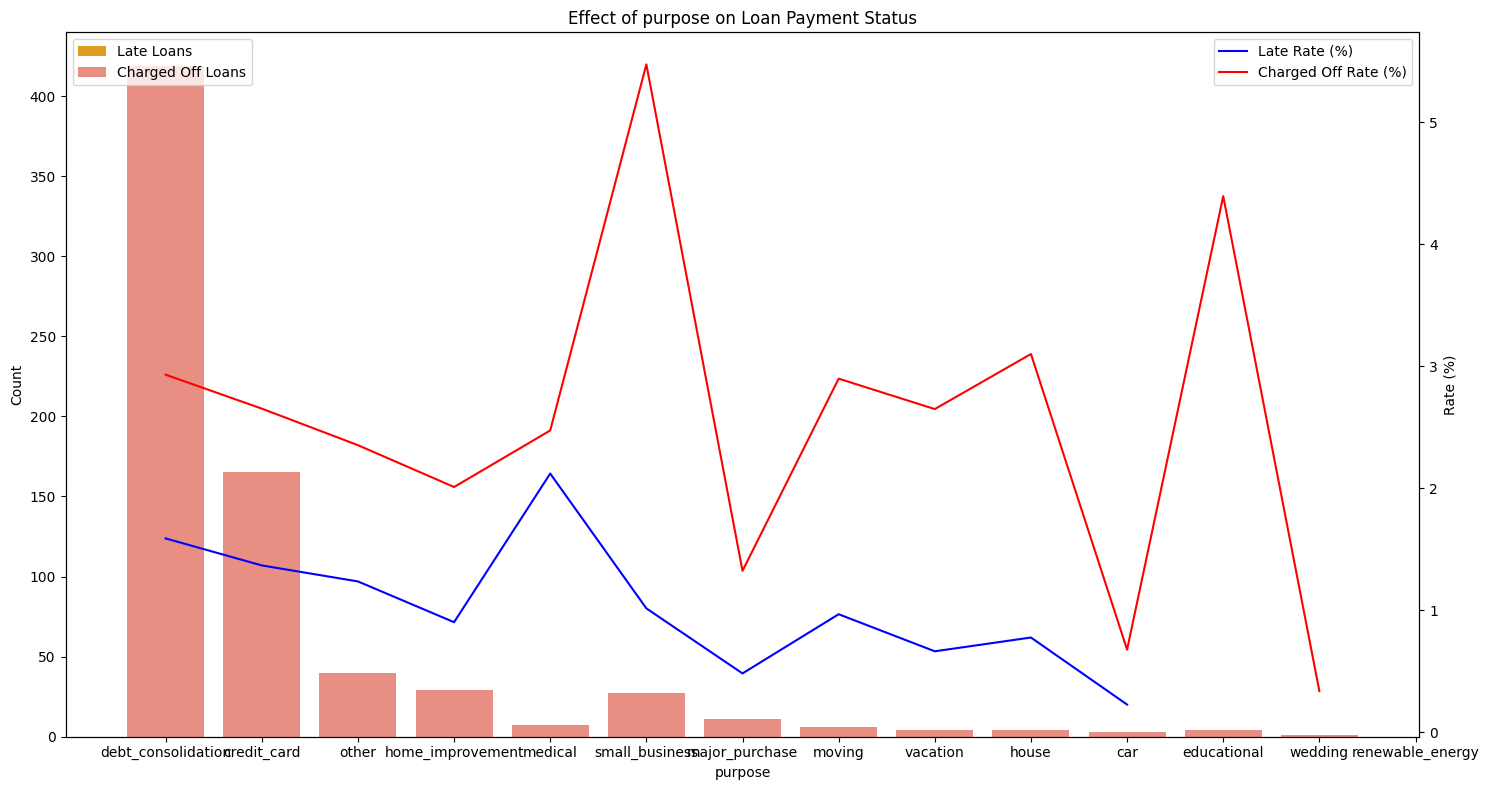

Indicator     Value  Total Count  Late Count  \
home_ownership                                                      
MORTGAGE        home_ownership  MORTGAGE        12312       138.0   
NONE            home_ownership      NONE            1         0.0   
OTHER           home_ownership     OTHER           21         0.0   
OWN             home_ownership       OWN         2344        45.0   
RENT            home_ownership      RENT        11943       183.0   

                Charged Off Count  Relative Late Rate (%)  \
home_ownership                                              
MORTGAGE                    303.0                1.120858   
NONE                          0.0                0.000000   
OTHER                         1.0                0.000000   
OWN                          76.0                1.919795   
RENT                        340.0                1.532278   

                Relative Charged Off Rate (%)  
home_ownership                                 
MORTGAGE                             2.461014  
NONE                                 0.000000  
OTHER                                4.761905  
OWN                                  3.242321  
RENT                                 2.846856

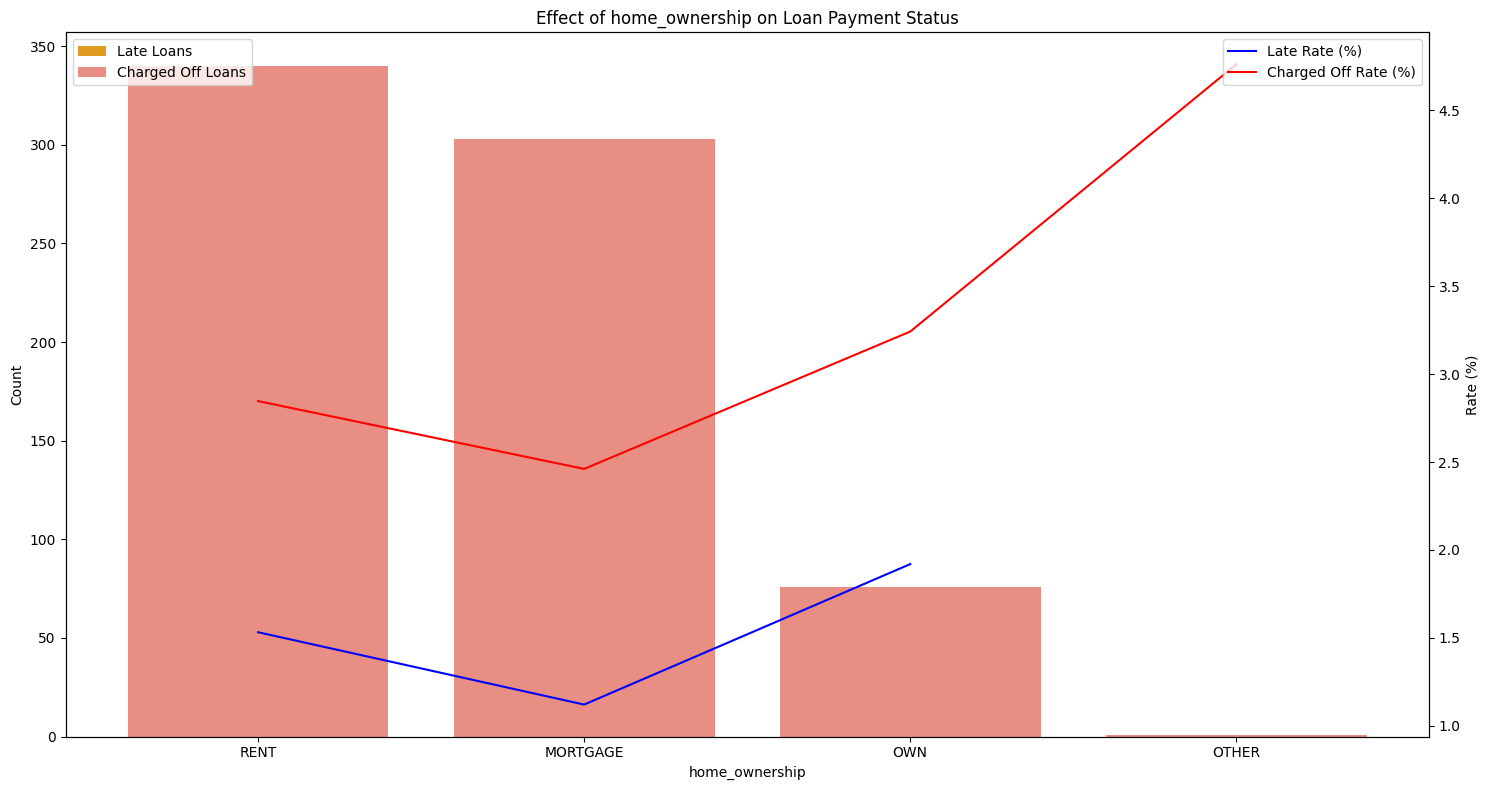

Indicator      Value  Total Count  Late Count  \
employment_length                                                          
1 year             employment_length     1 year         1898          15   
10+ years          employment_length  10+ years         7077          96   
2 years            employment_length    2 years         2599          43   
3 years            employment_length    3 years         2377          32   
4 years            employment_length    4 years         1793          19   
5 years            employment_length    5 years         1963          21   
6 years            employment_length    6 years         1577          20   
7 years            employment_length    7 years         1450          25   
8 years            employment_length    8 years         1274          19   
9 years            employment_length    9 years          983          19   
< 1 year           employment_length   < 1 year         2526          30   

                   Charged Off Count  Relative Late Rate (%)  \
employment_length                                              
1 year                            38                0.790306   
10+ years                        222                1.356507   
2 years                           67                1.654482   
3 years                           65                1.346235   
4 years                           35                1.059677   
5 years                           43                1.069791   
6 years                           43                1.268231   
7 years                           42                1.724138   
8 years                           35                1.491366   
9 years                           23                1.932859   
< 1 year                          51                1.187648   

                   Relative Charged Off Rate (%)  
employment_length                                 
1 year                                  2.002107  
10+ years                               3.136922  
2 years                                 2.577915  
3 years                                 2.734539  
4 years                                 1.952036  
5 years                                 2.190525  
6 years                                 2.726696  
7 years                                 2.896552  
8 years                                 2.747253  
9 years                                 2.339776  
< 1 year                                2.019002

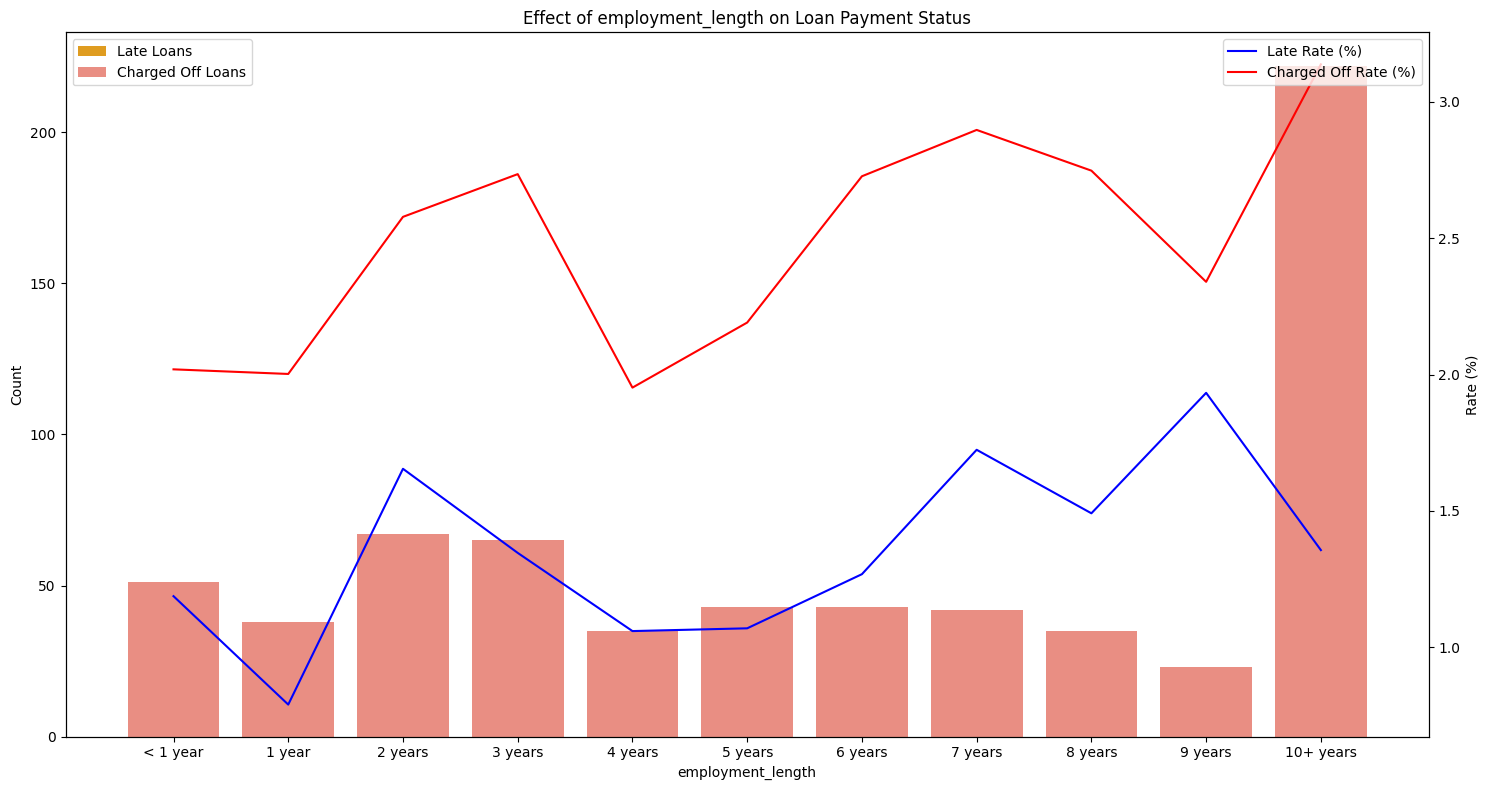

Indicator      Value  Total Count  Late Count  Charged Off Count  \
annual_inc                                                                      
9.747360    annual_inc   9.747360            1         0.0                0.0   
9.751792    annual_inc   9.751792            1         0.0                0.0   
9.760829    annual_inc   9.760829            1         0.0                0.0   
9.762903    annual_inc   9.762903            1         0.0                0.0   
9.763593    annual_inc   9.763593            2         0.0                0.0   
...                ...        ...          ...         ...                ...   
12.315012   annual_inc  12.315012            1         0.0                0.0   
12.317171   annual_inc  12.317171            1         0.0                0.0   
12.319406   annual_inc  12.319406            1         0.0                0.0   
12.321190   annual_inc  12.321190            1         0.0                0.0   
12.323860   annual_inc  12.323860           18         0.0                0.0   

            Relative Late Rate (%)  Relative Charged Off Rate (%)  
annual_inc                                                         
9.747360                       0.0                            0.0  
9.751792                       0.0                            0.0  
9.760829                       0.0                            0.0  
9.762903                       0.0                            0.0  
9.763593                       0.0                            0.0  
...                            ...                            ...  
12.315012                      0.0                            0.0  
12.317171                      0.0                            0.0  
12.319406                      0.0                            0.0  
12.321190                      0.0                            0.0  
12.323860                      0.0                            0.0  

[3366 rows x 7 columns]

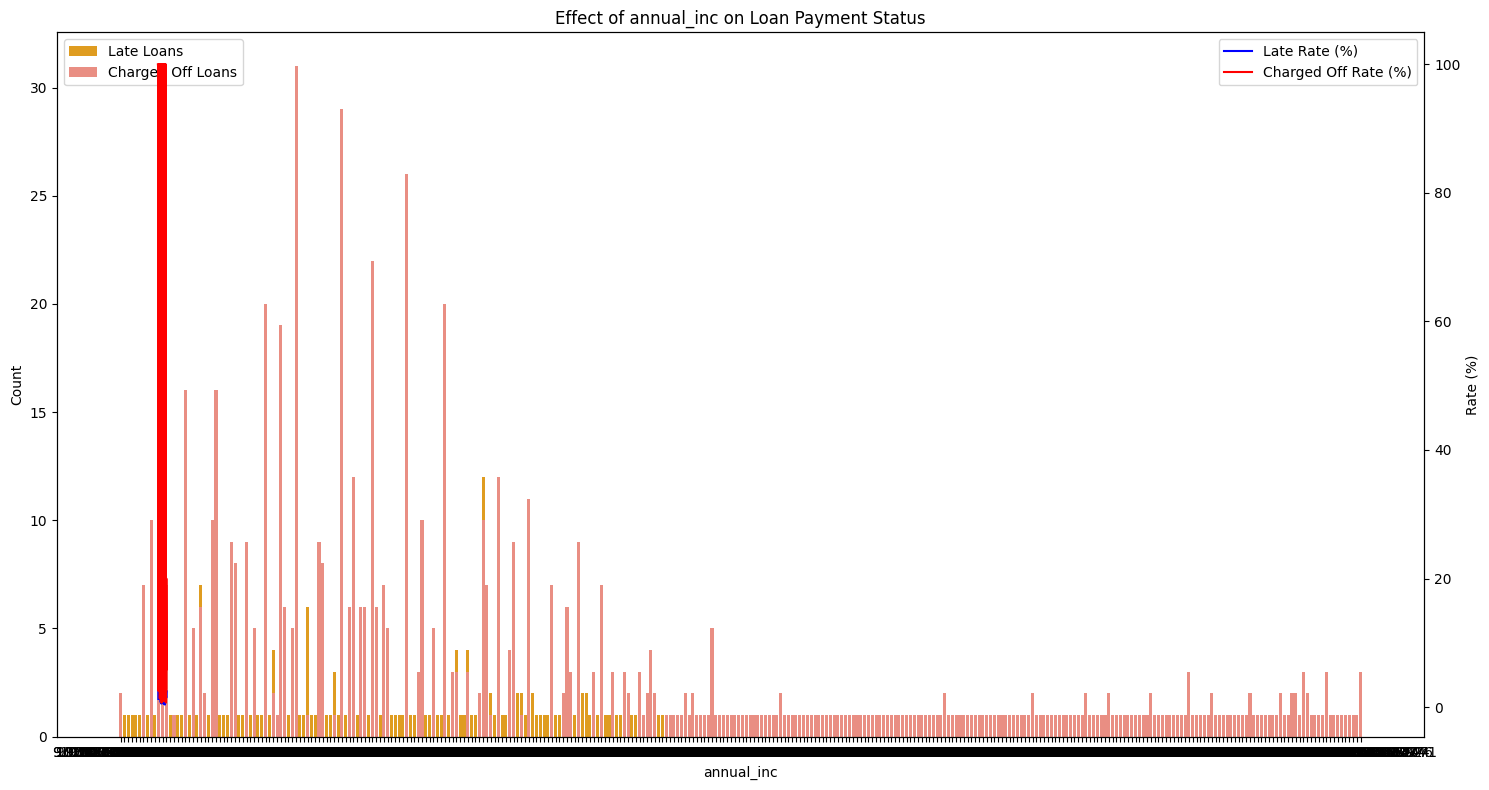

Indicator  Value  Total Count  Late Count  Charged Off Count  \
dti                                                                  
0.00        dti   0.00           38         0.0                1.0   
0.02        dti   0.02            2         0.0                0.0   
0.07        dti   0.07            2         0.0                0.0   
0.08        dti   0.08            1         0.0                0.0   
0.11        dti   0.11            1         0.0                0.0   
...         ...    ...          ...         ...                ...   
37.38       dti  37.38            1         0.0                1.0   
37.48       dti  37.48            1         1.0                0.0   
37.63       dti  37.63            1         0.0                0.0   
37.91       dti  37.91            1         0.0                0.0   
37.94       dti  37.94            1         0.0                0.0   

       Relative Late Rate (%)  Relative Charged Off Rate (%)  
dti                                                           
0.00                      0.0                       2.631579  
0.02                      0.0                       0.000000  
0.07                      0.0                       0.000000  
0.08                      0.0                       0.000000  
0.11                      0.0                       0.000000  
...                       ...                            ...  
37.38                     0.0                     100.000000  
37.48                   100.0                       0.000000  
37.63                     0.0                       0.000000  
37.91                     0.0                       0.000000  
37.94                     0.0                       0.000000  

[3398 rows x 7 columns]

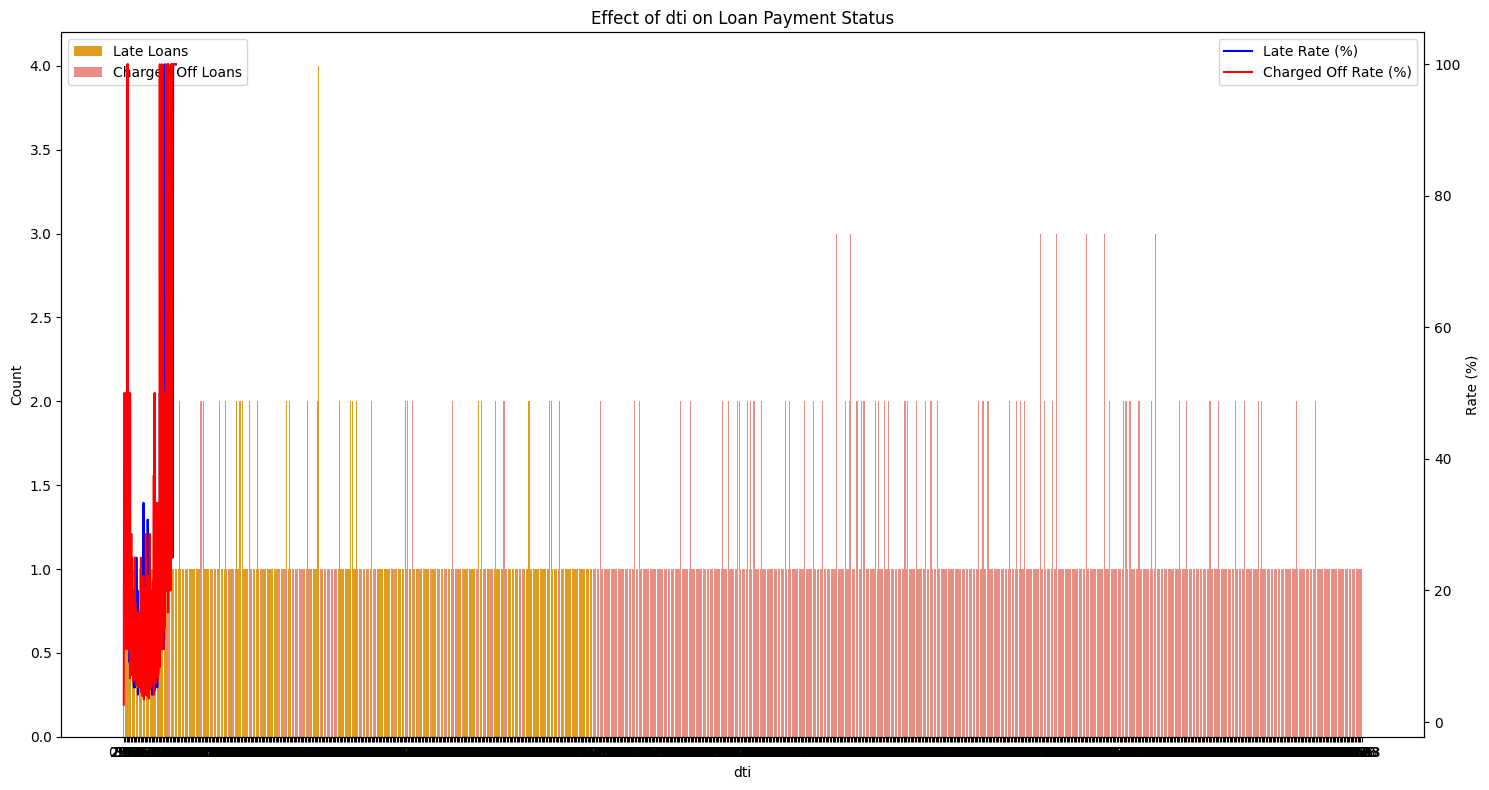

Indicator            Value  Total Count  \
verification_status                                                      
Not Verified         verification_status     Not Verified        10927   
Source Verified      verification_status  Source Verified         7233   
Verified             verification_status         Verified         8461   

                     Late Count  Charged Off Count  Relative Late Rate (%)  \
verification_status                                                          
Not Verified                132                262                1.208017   
Source Verified              98                196                1.354901   
Verified                    136                262                1.607375   

                     Relative Charged Off Rate (%)  
verification_status                                 
Not Verified                              2.397730  
Source Verified                           2.709802  
Verified                                  3.096561

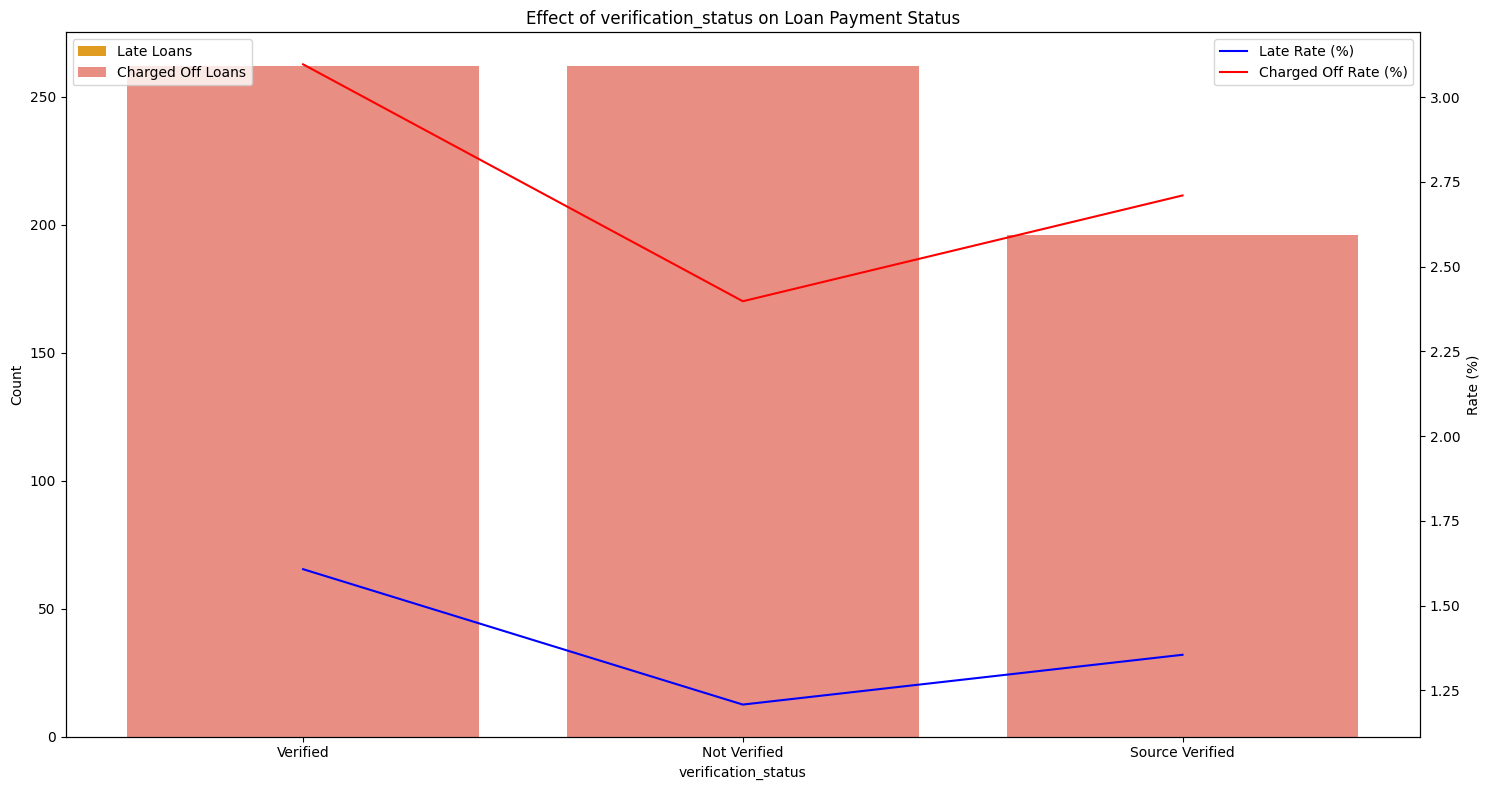

Indicator  Value  Total Count  Late Count  Charged Off Count  \
delinq_2yrs                                                                   
0.0          delinq_2yrs    0.0        26621         366                720   

             Relative Late Rate (%)  Relative Charged Off Rate (%)  
delinq_2yrs                                                         
0.0                        1.374854                       2.704632

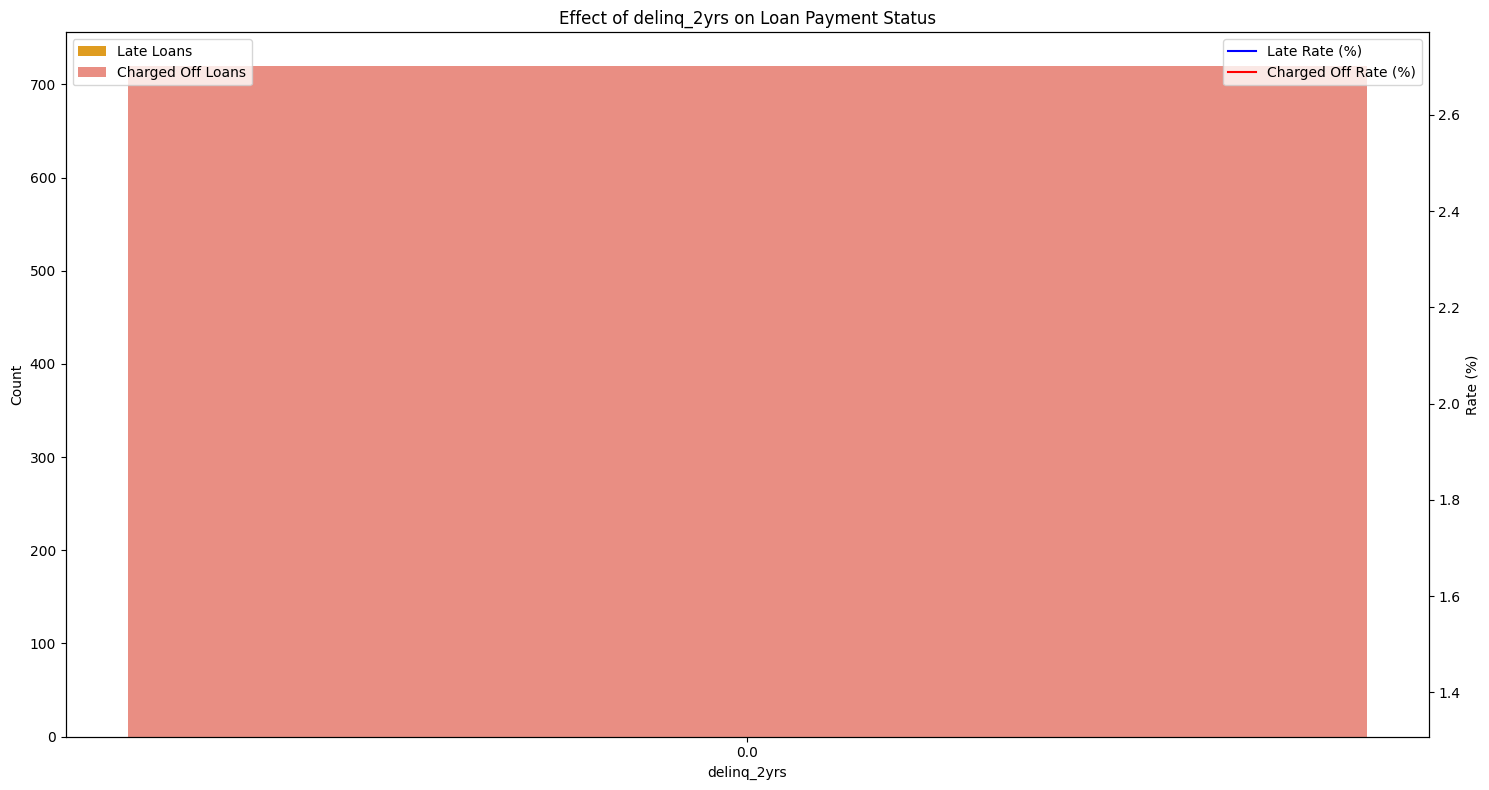

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the cleaned CSV file from the actual path provided
cleaned_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments_no_correlated.csv'
df = pd.read_csv(cleaned_csv_file_path)

# Identify customers behind on their loan payments (late statuses)
late_statuses = ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period']
late_loans = df[df['loan_status'].isin(late_statuses)].copy()

# Identify customers who have already stopped paying (charged off)
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

# Function to calculate relative rates for each indicator
def calculate_relative_rates(df, indicator):
    total_count = df[indicator].value_counts()
    late_count = late_loans[indicator].value_counts()
    charged_off_count = charged_off_loans[indicator].value_counts()
    relative_late_rate = (late_count / total_count) * 100
    relative_charged_off_rate = (charged_off_count / total_count) * 100
    return total_count, late_count, charged_off_count, relative_late_rate, relative_charged_off_rate

# Plotting function for each indicator
def plot_indicator_comparison(indicator, late_count, charged_off_count, relative_late_rate, relative_charged_off_rate, order=None):
    fig, ax1 = plt.subplots(figsize=(15, 8))  # Increase figure size for better readability
    
    if order:
        late_count = late_count.reindex(order)
        charged_off_count = charged_off_count.reindex(order)
        relative_late_rate = relative_late_rate.reindex(order)
        relative_charged_off_rate = relative_charged_off_rate.reindex(order)
    
    ax2 = ax1.twinx()
    sns.barplot(x=late_count.index, y=late_count.values, ax=ax1, color='orange', label='Late Loans')
    sns.barplot(x=charged_off_count.index, y=charged_off_count.values, ax=ax1, color='salmon', label='Charged Off Loans')
    
    sns.lineplot(x=relative_late_rate.index, y=relative_late_rate.values, ax=ax2, color='blue', label='Late Rate (%)')
    sns.lineplot(x=relative_charged_off_rate.index, y=relative_charged_off_rate.values, ax=ax2, color='red', label='Charged Off Rate (%)')
    
    ax1.set_xlabel(indicator)
    ax1.set_ylabel('Count')
    ax2.set_ylabel('Rate (%)')
    plt.title(f'Effect of {indicator} on Loan Payment Status')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Analyze each indicator for late loans and charged off loans
indicator_columns = ['grade', 'purpose', 'home_ownership', 'employment_length', 'annual_inc', 'dti', 'verification_status', 'delinq_2yrs']

# Ensure employment length is ordered correctly
employment_length_order = ["< 1 year", "1 year", "2 years", "3 years", "4 years", "5 years", "6 years", "7 years", "8 years", "9 years", "10+ years"]

for indicator in indicator_columns:
    total_count, late_count, charged_off_count, relative_late_rate, relative_charged_off_rate = calculate_relative_rates(df, indicator)
    
    # Combine the data for easier analysis
    indicator_data = pd.DataFrame({
        'Total Count': total_count,
        'Late Count': late_count,
        'Charged Off Count': charged_off_count,
        'Relative Late Rate (%)': relative_late_rate,
        'Relative Charged Off Rate (%)': relative_charged_off_rate
    }).fillna(0)
    
    # Add indicator column for identification
    indicator_data['Indicator'] = indicator
    indicator_data['Value'] = indicator_data.index
    
    # Reorder columns for better readability
    indicator_data = indicator_data[['Indicator', 'Value', 'Total Count', 'Late Count', 'Charged Off Count', 'Relative Late Rate (%)', 'Relative Charged Off Rate (%)']]
    
    # Display the summary dataframe as a pop-up
    display(indicator_data)
    
    # Plot the indicator comparison
    if indicator == 'employment_length':
        plot_indicator_comparison(indicator, late_count, charged_off_count, relative_late_rate, relative_charged_off_rate, order=employment_length_order)
    else:
        plot_indicator_comparison(indicator, late_count, charged_off_count, relative_late_rate, relative_charged_off_rate)
